In [7]:
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv('./nba_data_processed.csv')

In [10]:
df['Offensive Efficiency'] = (df['FG'] + df['3P'] + df['2P'] + df['FT'] + df['PTS']) / 5
df['Defensive Efficiency'] = (df['TRB'] + df['STL'] + df['BLK']) / 3
df['Total Efficiency'] = (df['Offensive Efficiency'] + df['Defensive Efficiency']) / 2
df['Game Impact'] = (df['PTS'] + df['AST'] + df['TRB'] + df['STL'] + df['BLK']) / 5



general_analysis_columns = ['FG','3P', '2P', 'FT', 'eFG%', 'TRB', 'AST', 'STL', 'BLK', 'PTS', 'TOV', 'Offensive Efficiency', 'Defensive Efficiency', 'Total Efficiency', 'Game Impact']

# Teams

In [4]:
team_analysis = df.loc[:, general_analysis_columns + ['Tm']]

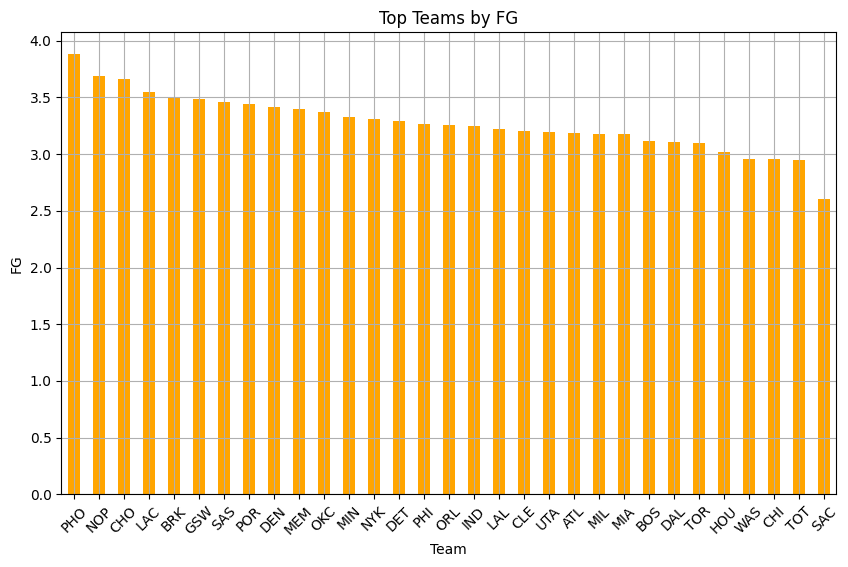

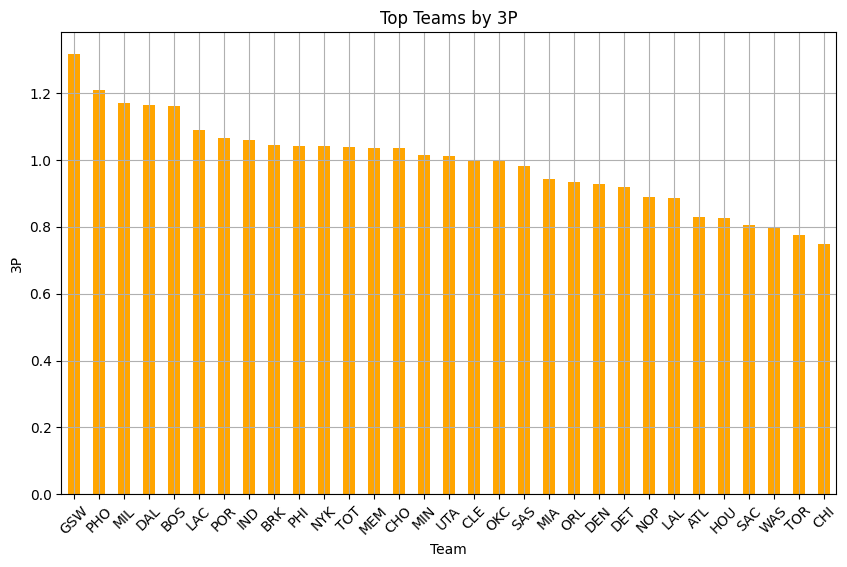

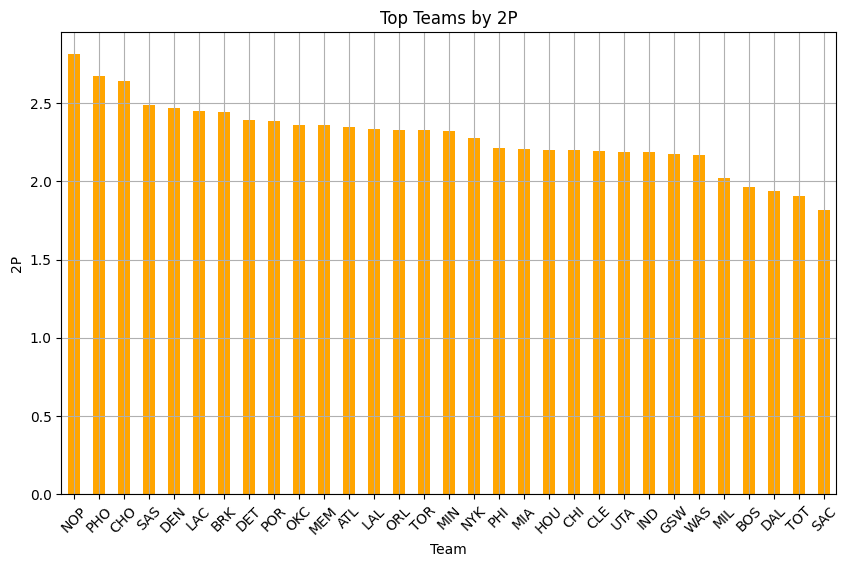

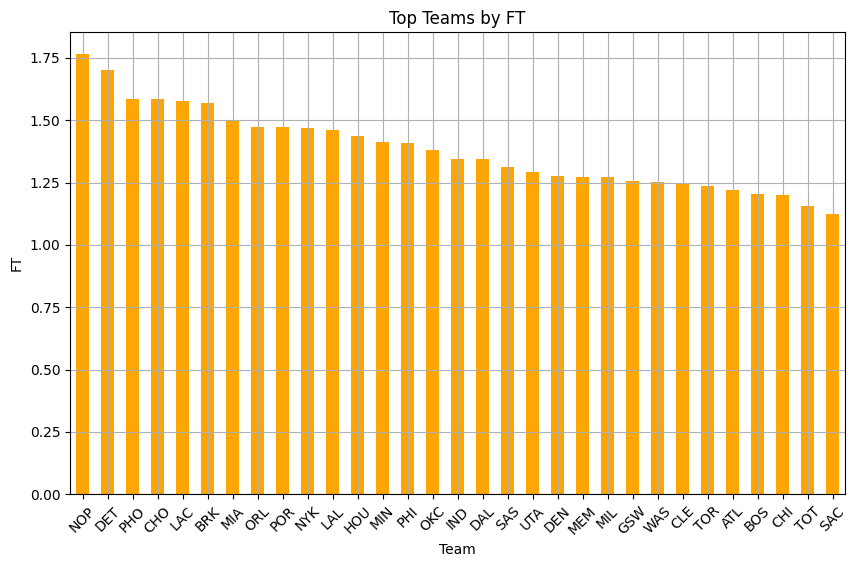

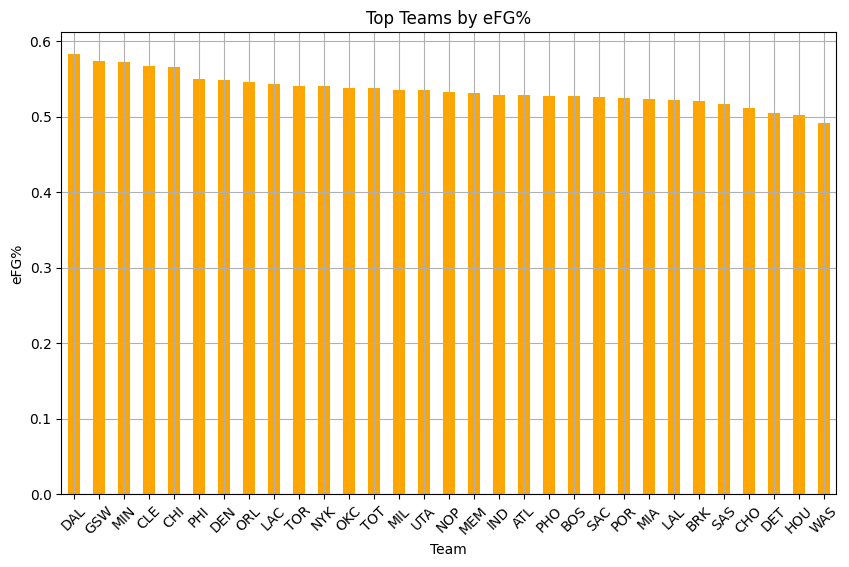

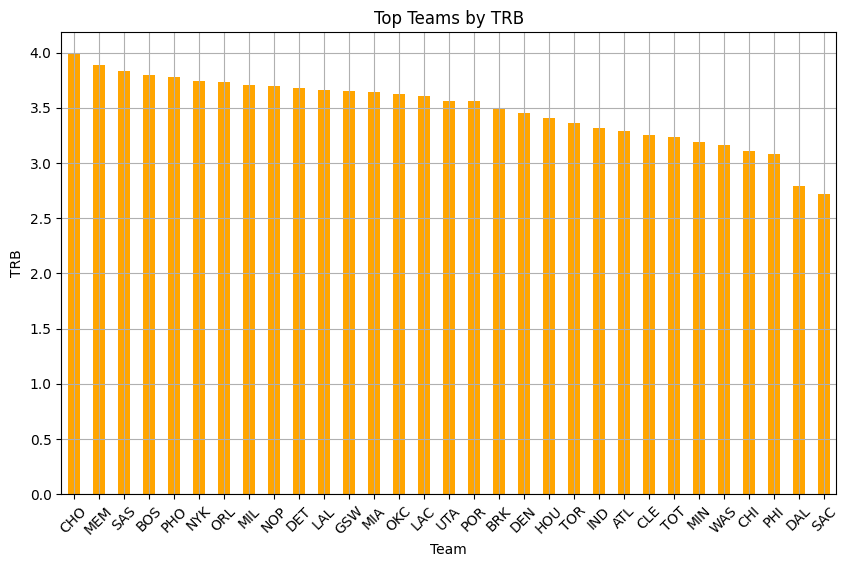

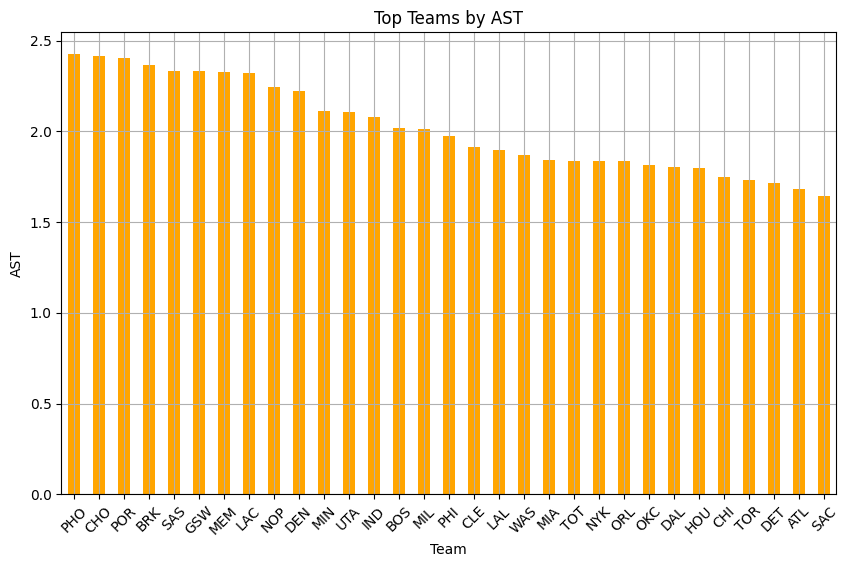

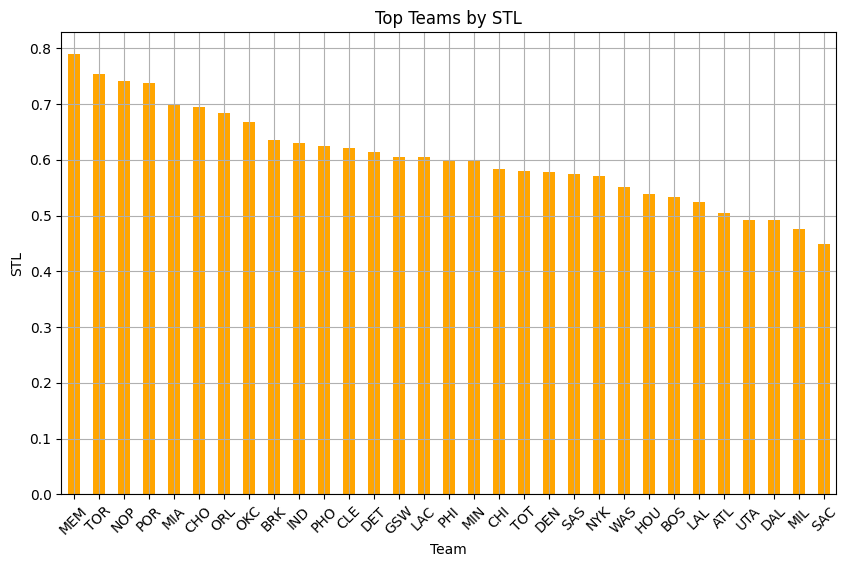

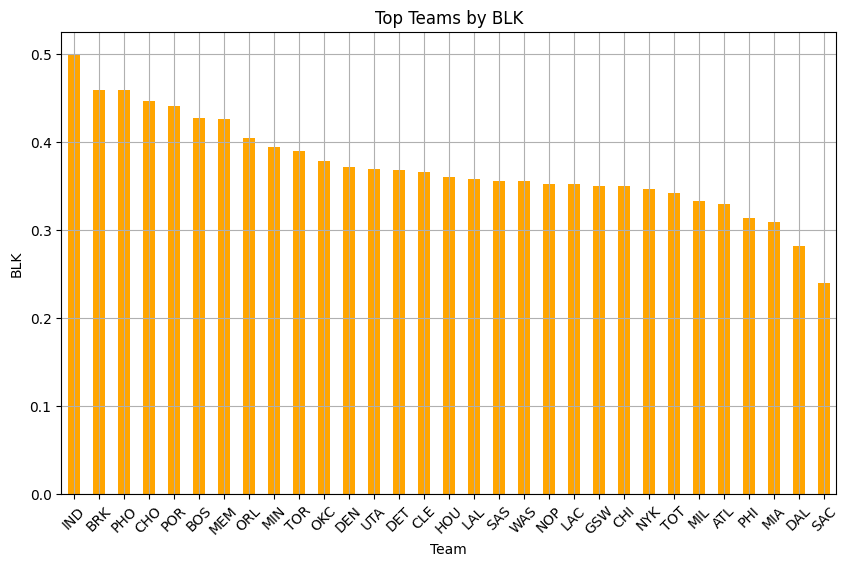

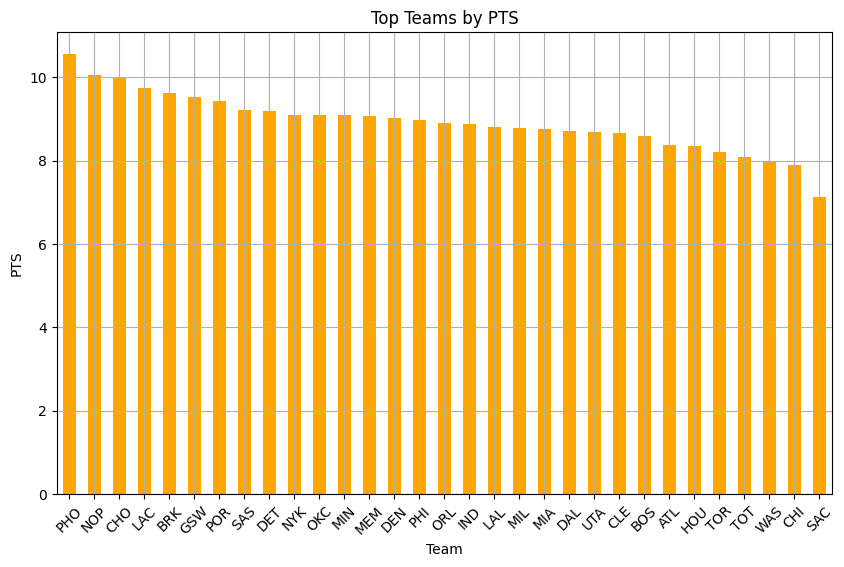

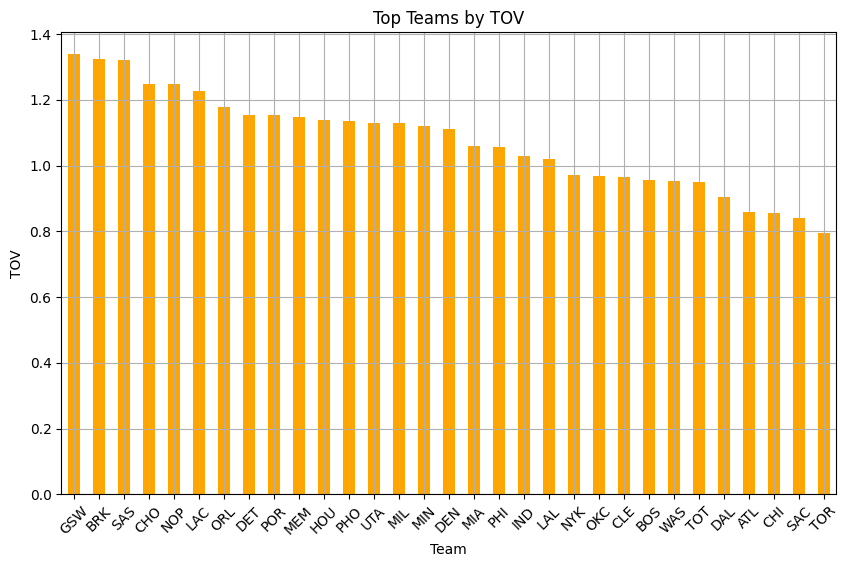

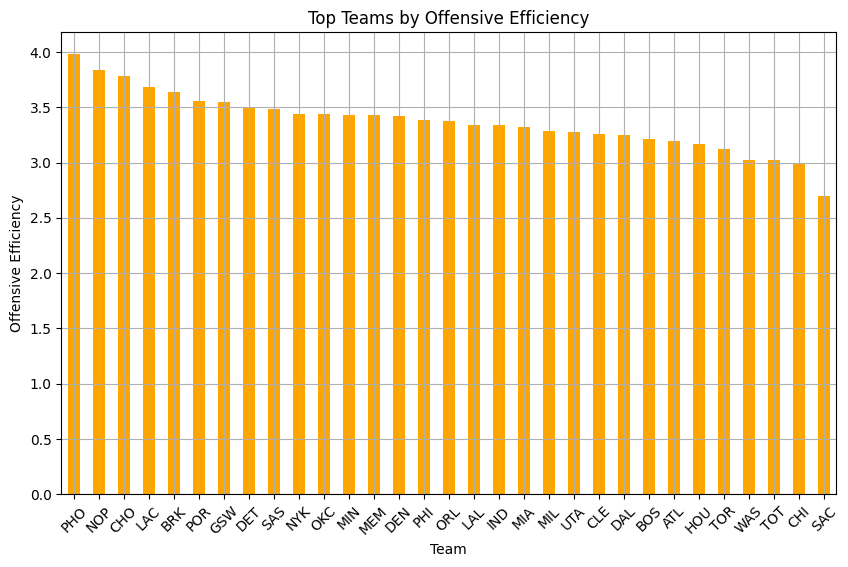

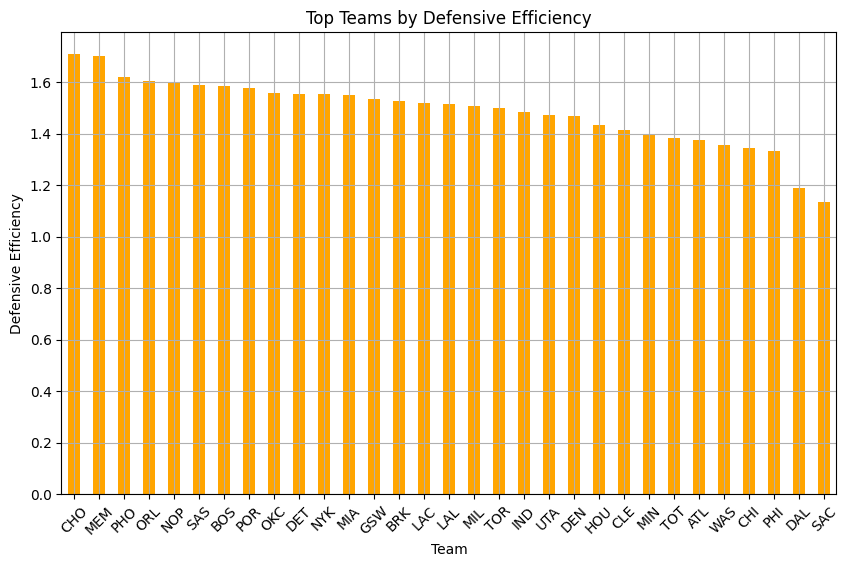

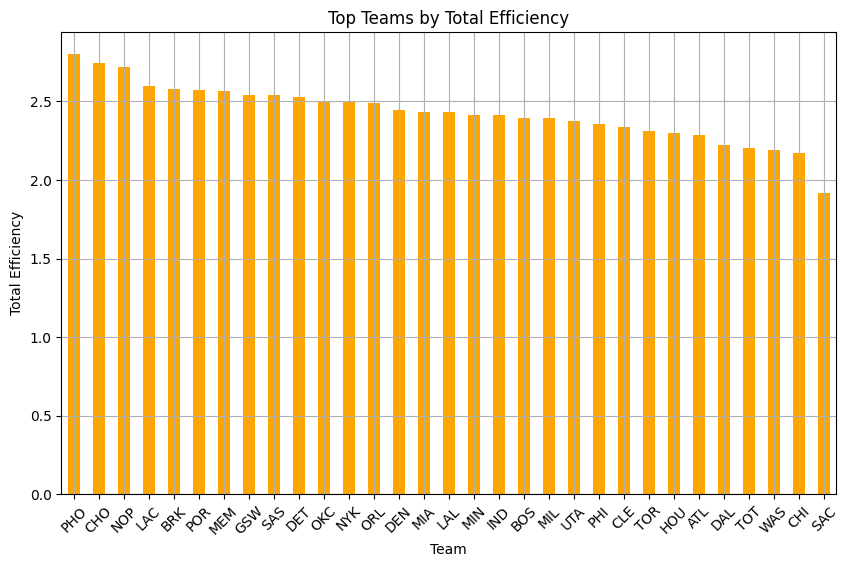

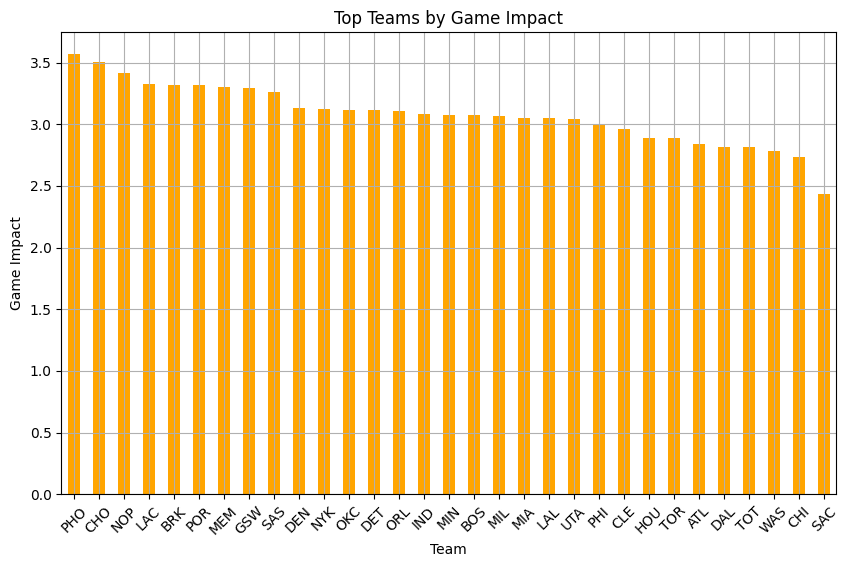

In [133]:
for col in team_analysis:
    if col != 'Tm':
        team_avg_analysis = team_analysis.groupby('Tm')[col].mean().sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        team_avg_analysis.plot(kind='bar', color='orange')
        plt.title(f"Top Teams by {col}")
        plt.xlabel('Team')
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

# Player

In [144]:
player_analysis = df.loc[:, general_analysis_columns + ['Player', 'Tm']]

In [147]:
def top_20_players(df):
    top_10_players = df.head(20)
    return pd.concat([top_10_players])


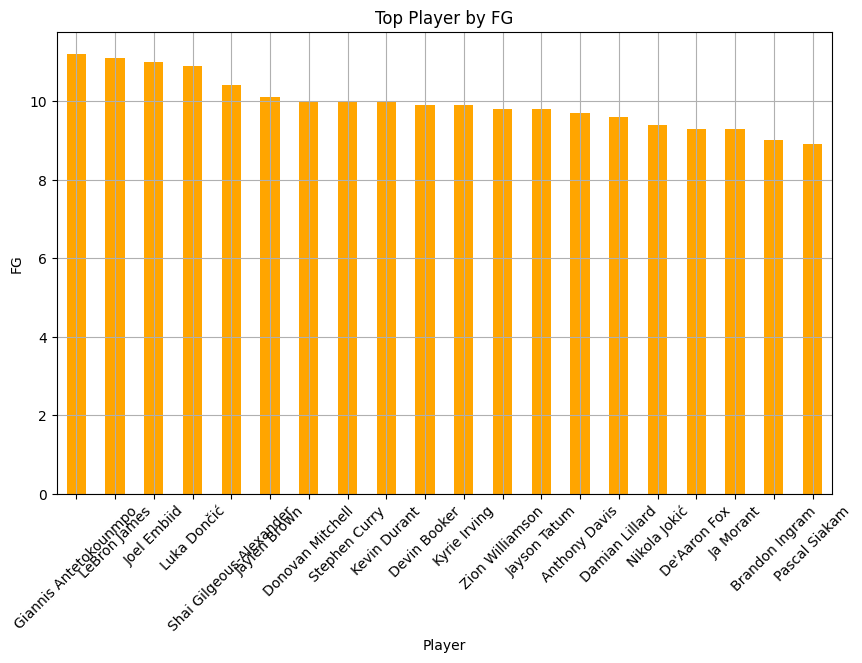

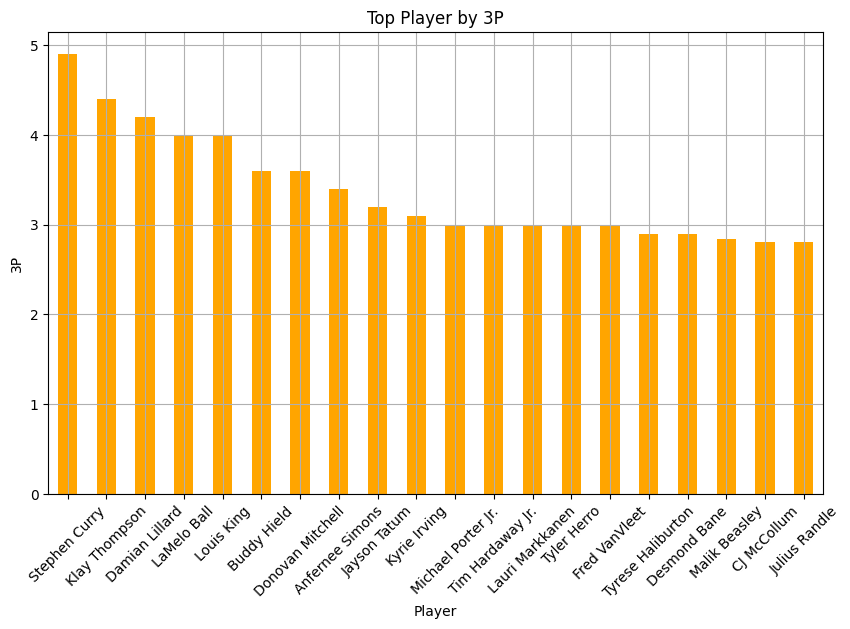

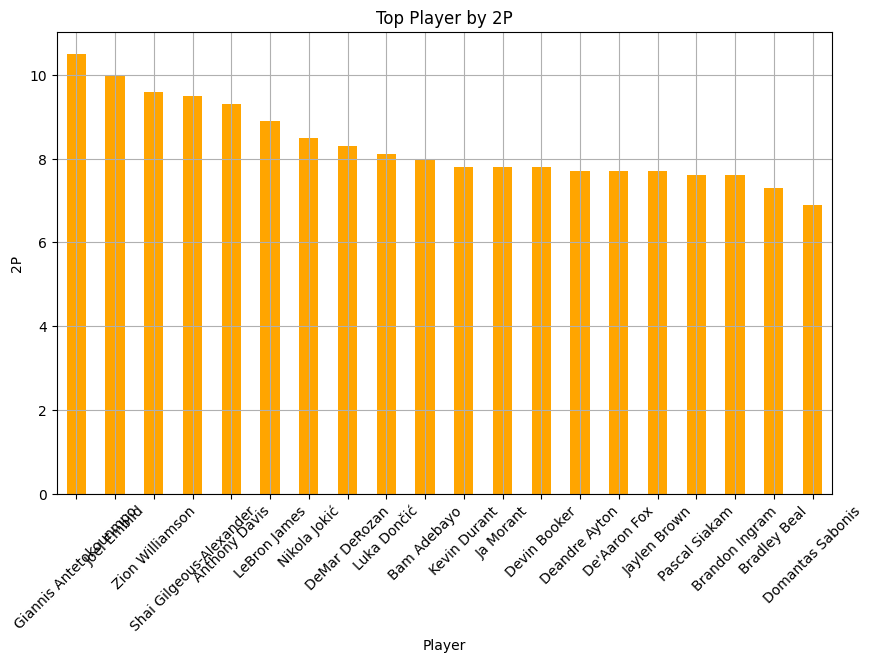

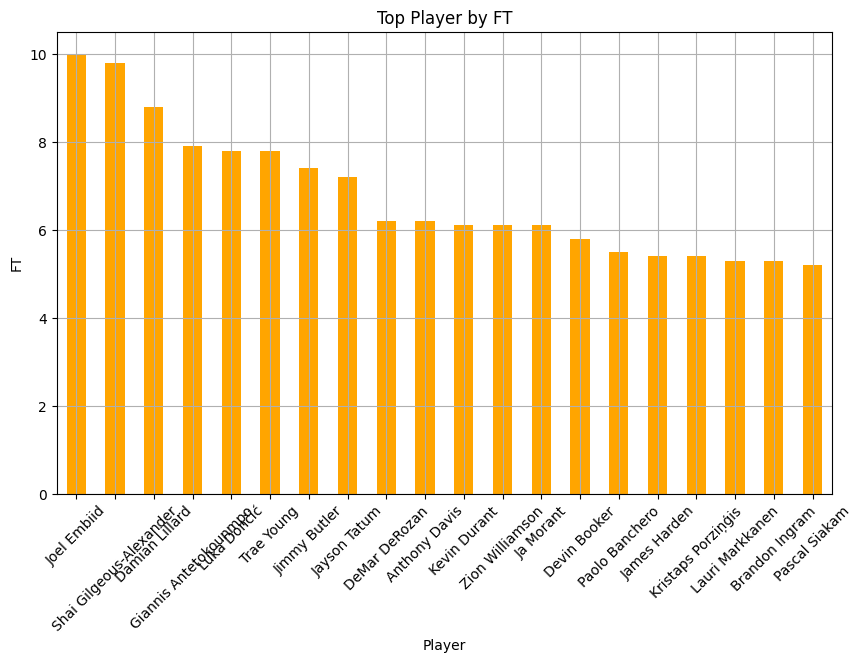

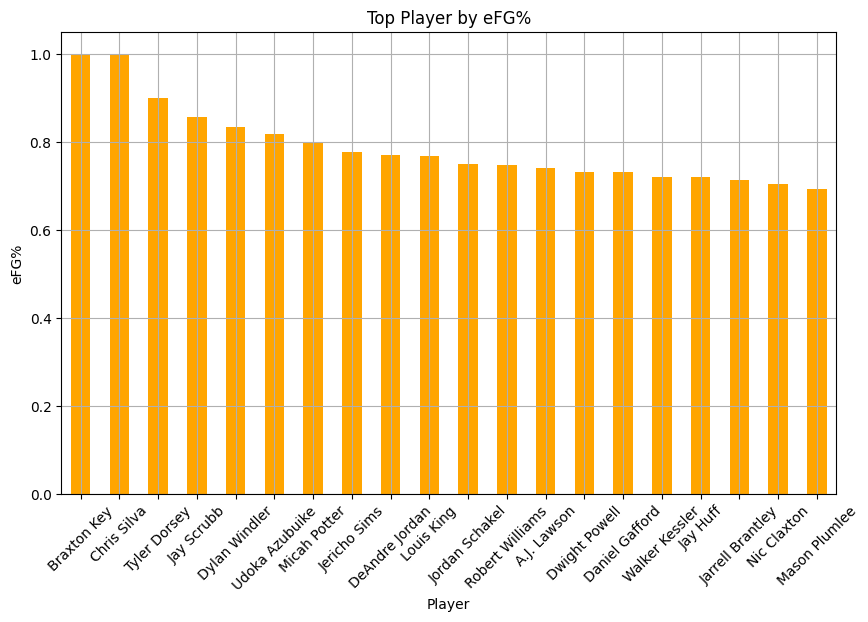

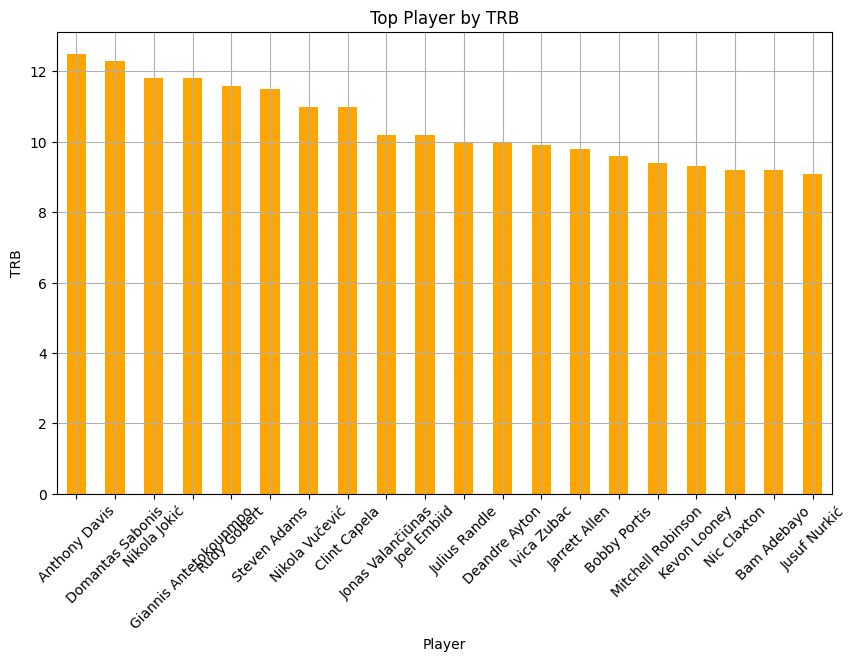

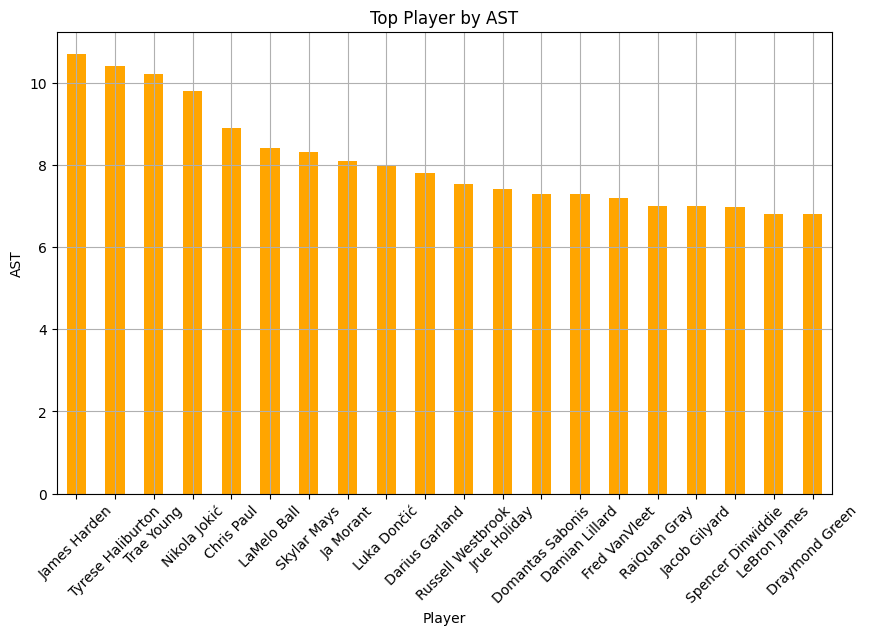

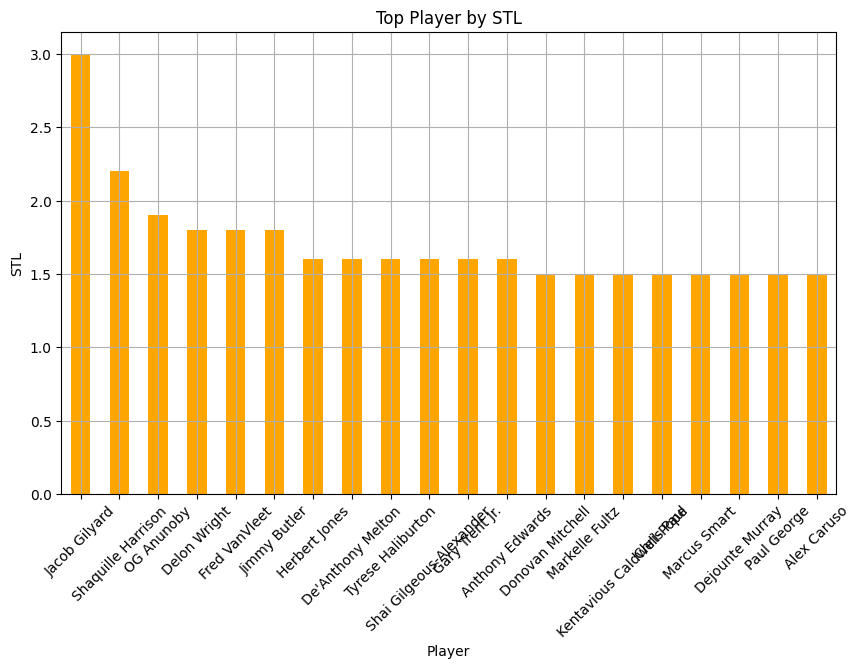

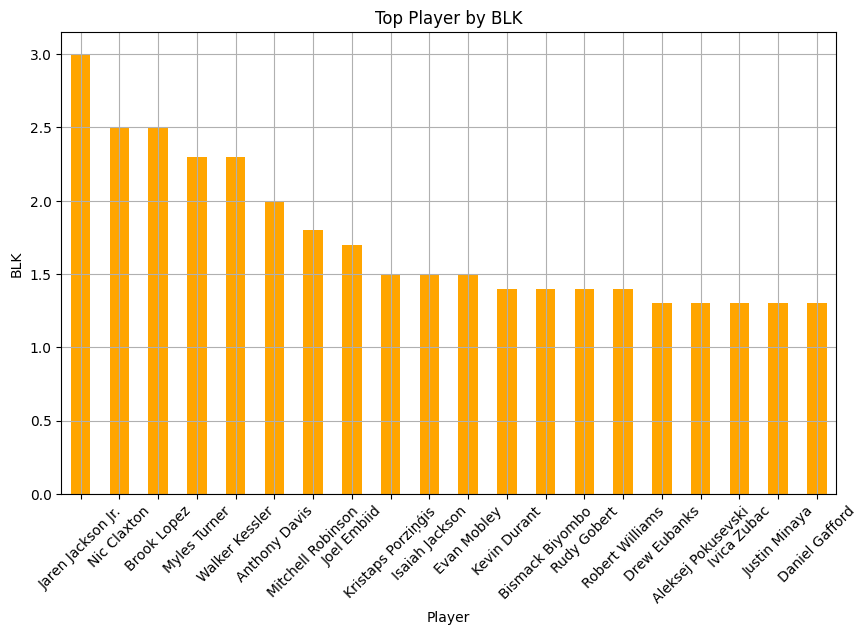

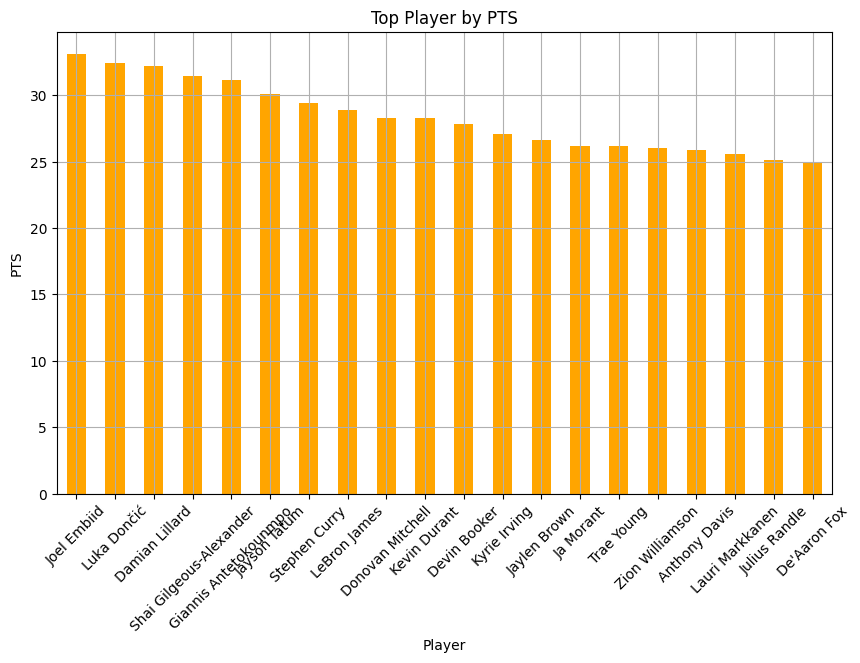

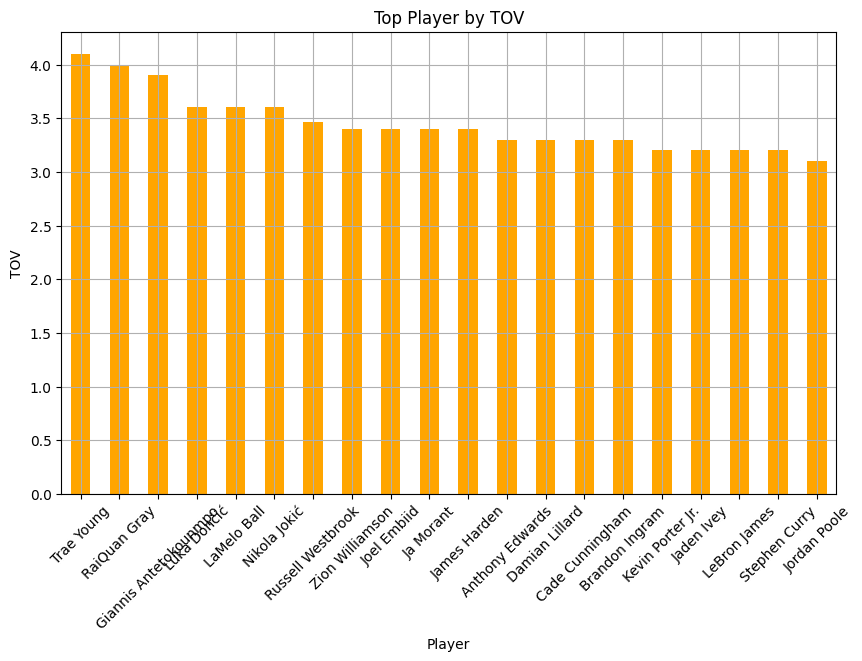

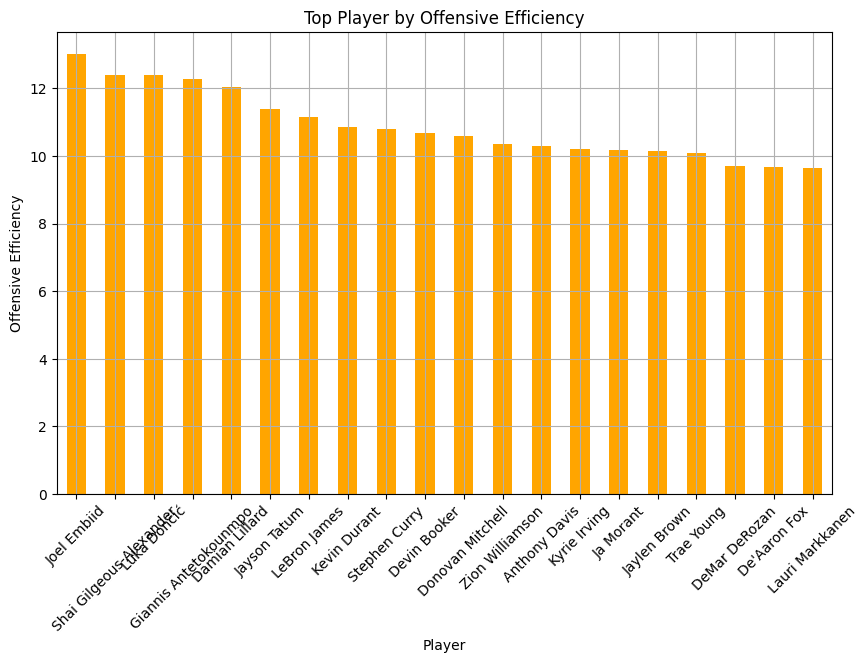

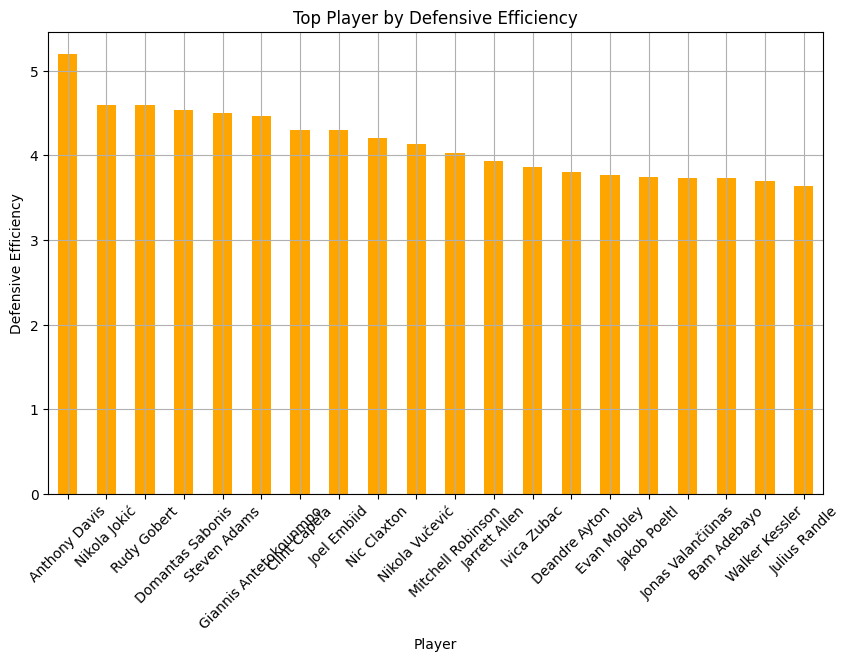

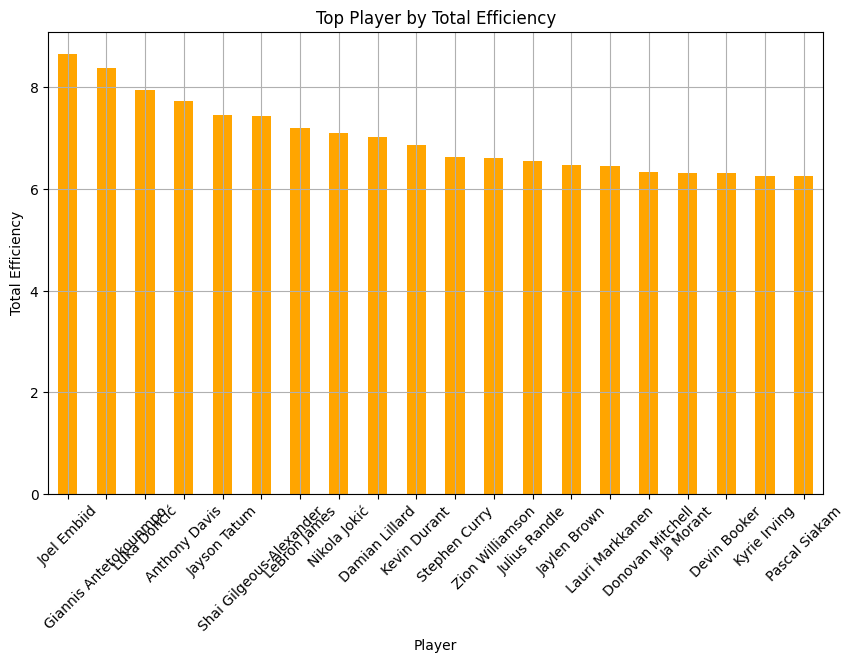

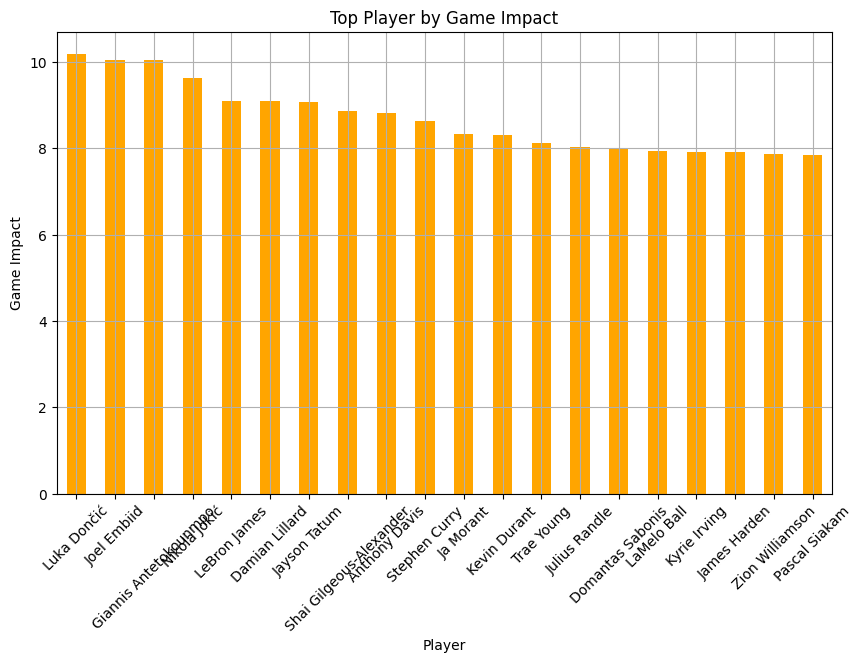

In [148]:
for col in player_analysis:
    if col != 'Player' and col != 'Tm' and col != 'Player (Tm)':
        player_avg_analysis = player_analysis.groupby('Player')[col].mean().sort_values(ascending=False)
        player_avg_analysis = player_avg_analysis[player_avg_analysis != 0]
        player_avg_analysis_filtered = top_20_players(player_avg_analysis)
        plt.figure(figsize=(10, 6))
        player_avg_analysis_filtered.plot(kind='bar', color='orange')
        plt.title(f"Top Player by {col}")
        plt.xlabel('Player')
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()


# Position

In [5]:
position_analysis = df.loc[:, general_analysis_columns + ['Pos']]

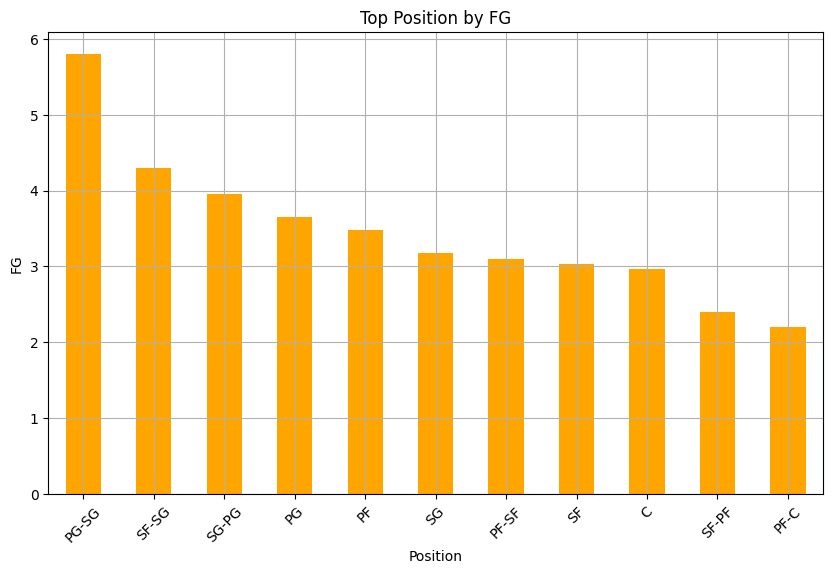

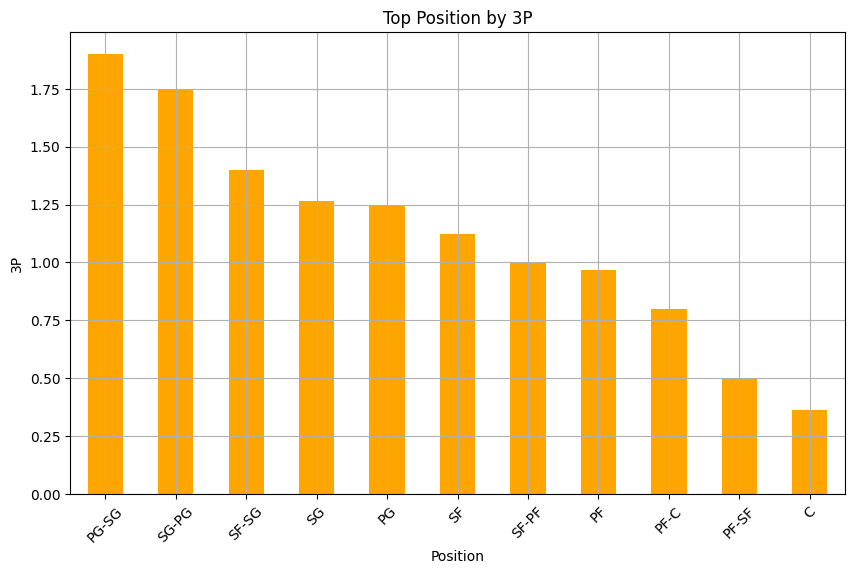

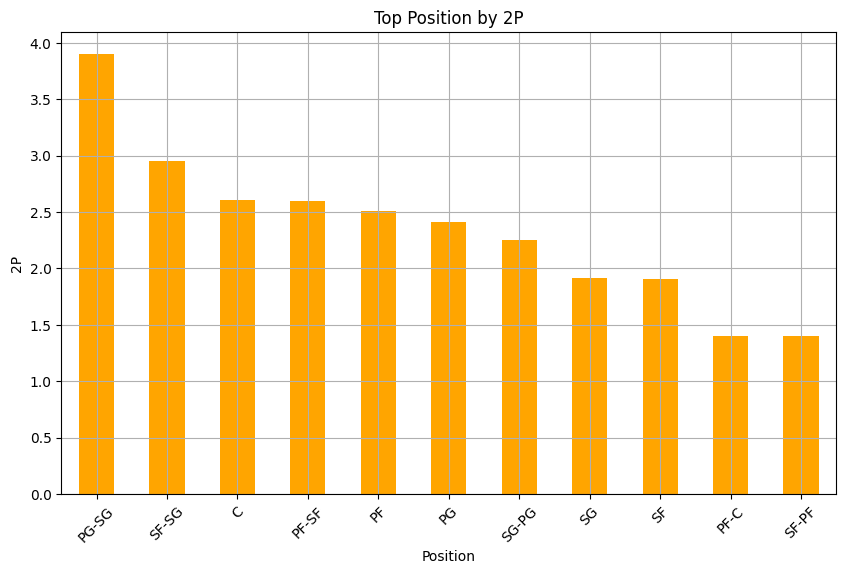

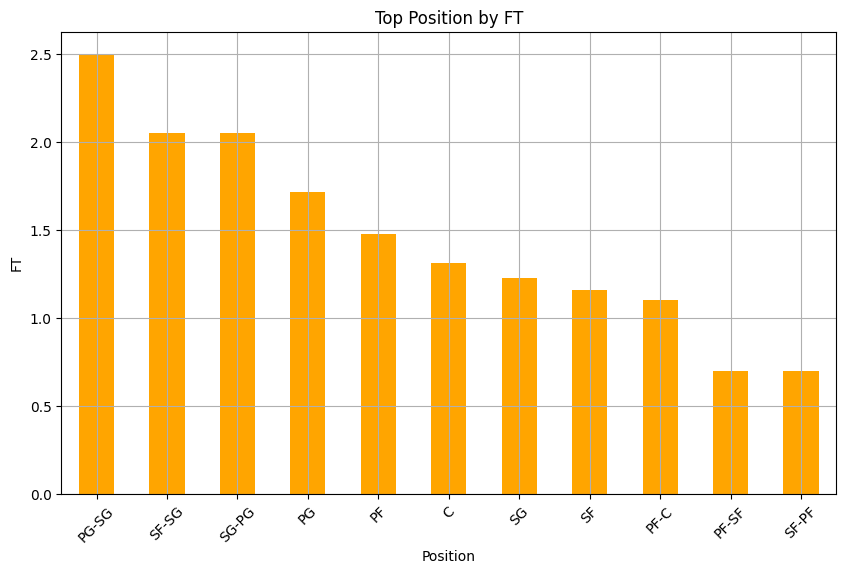

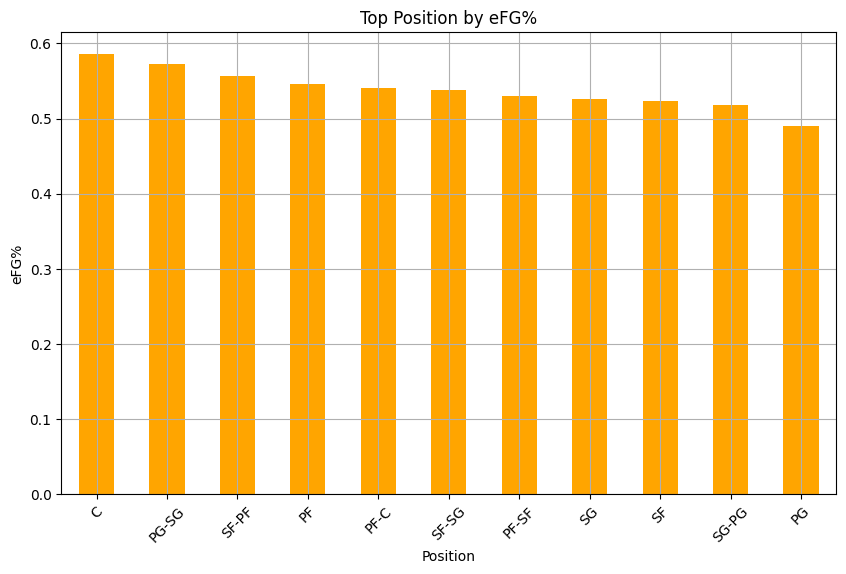

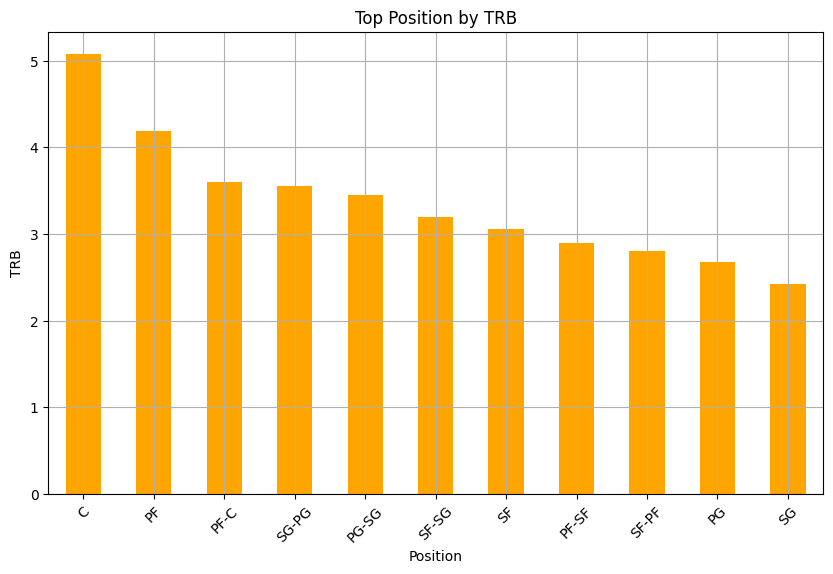

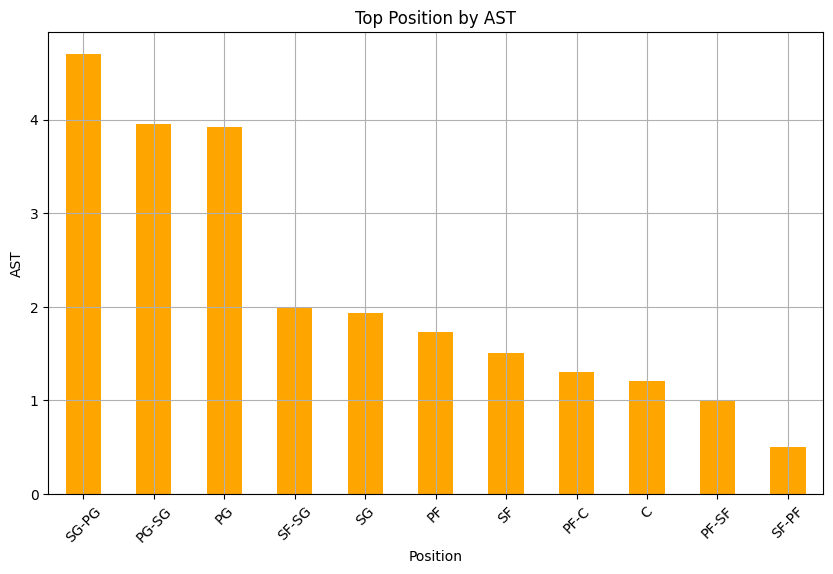

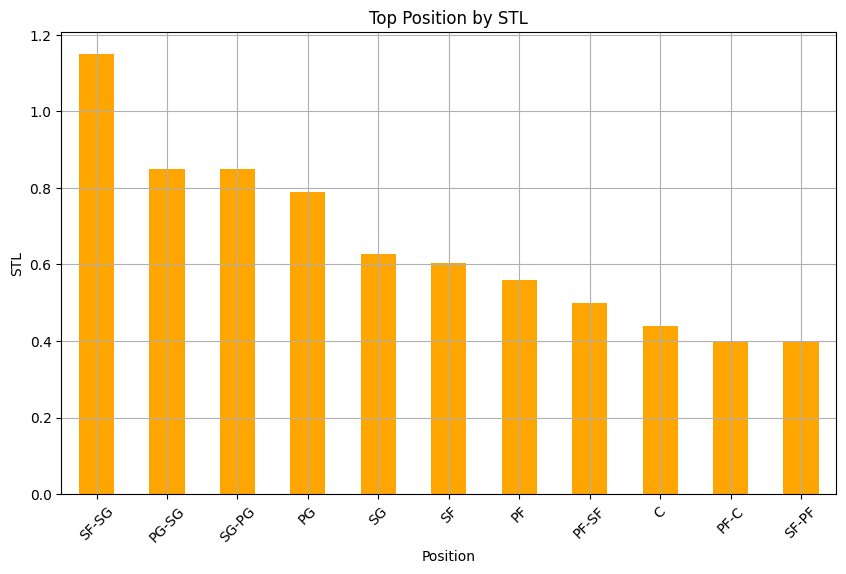

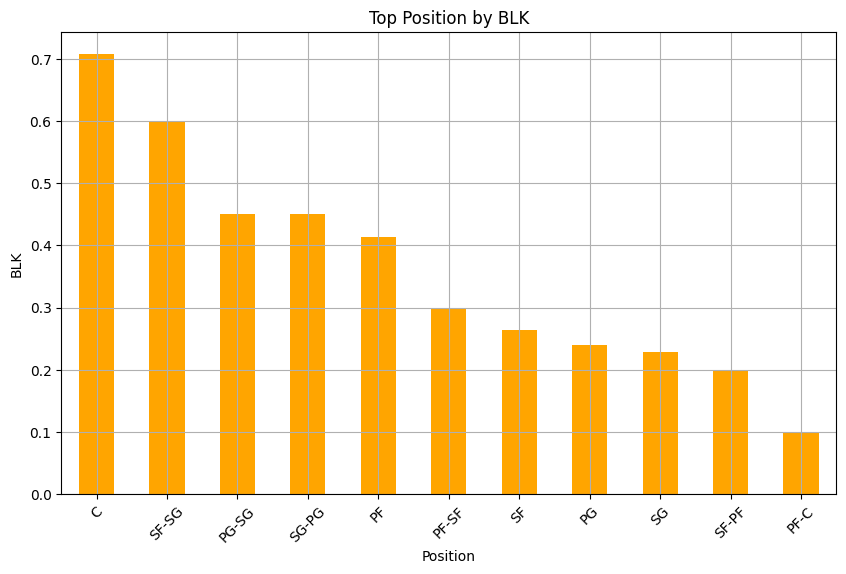

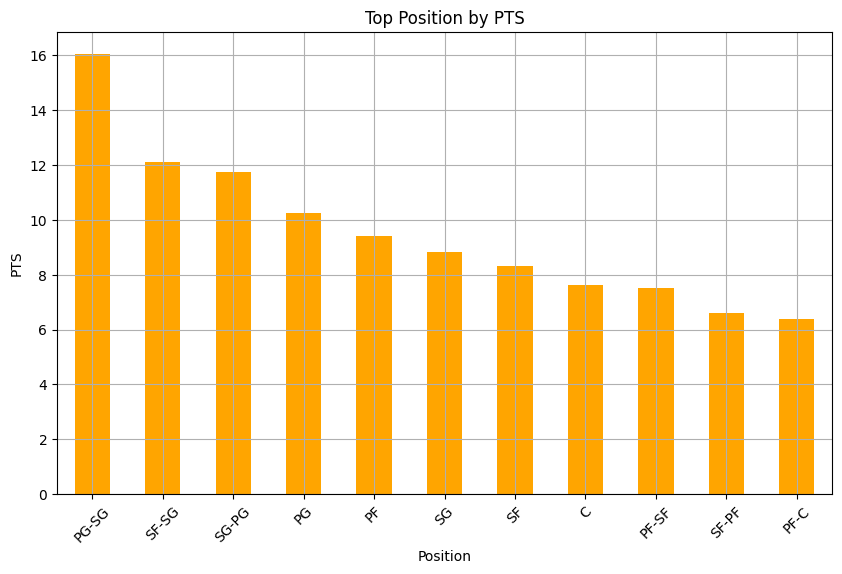

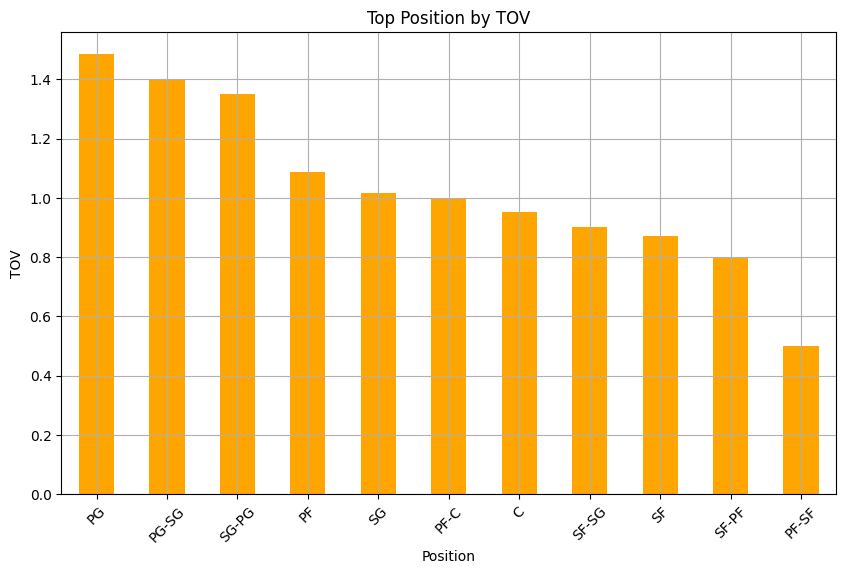

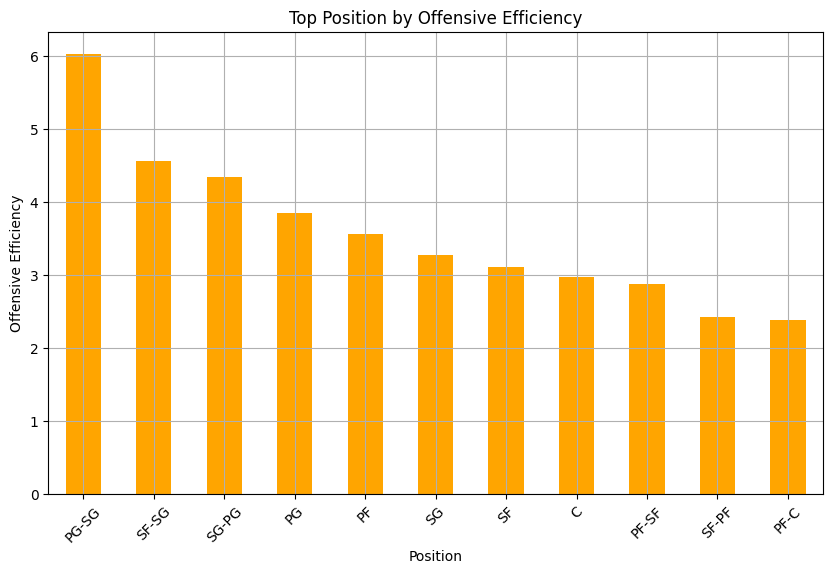

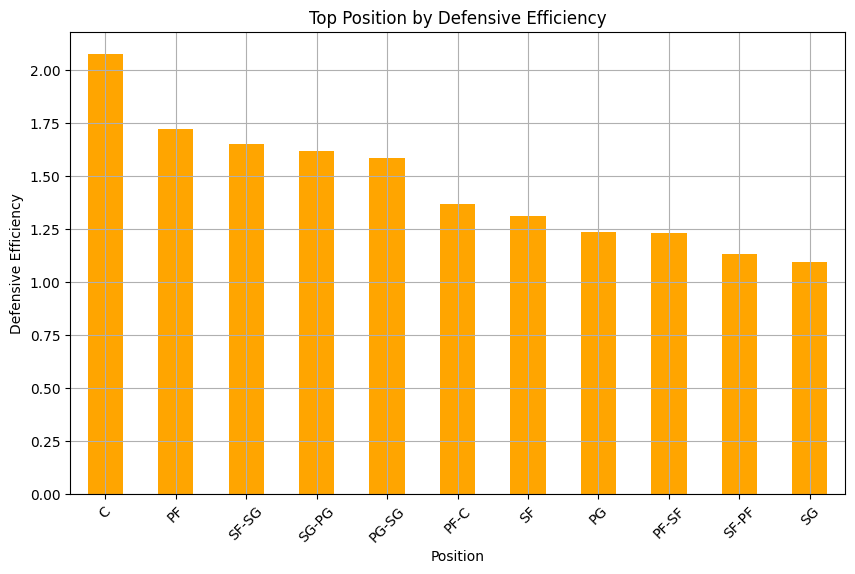

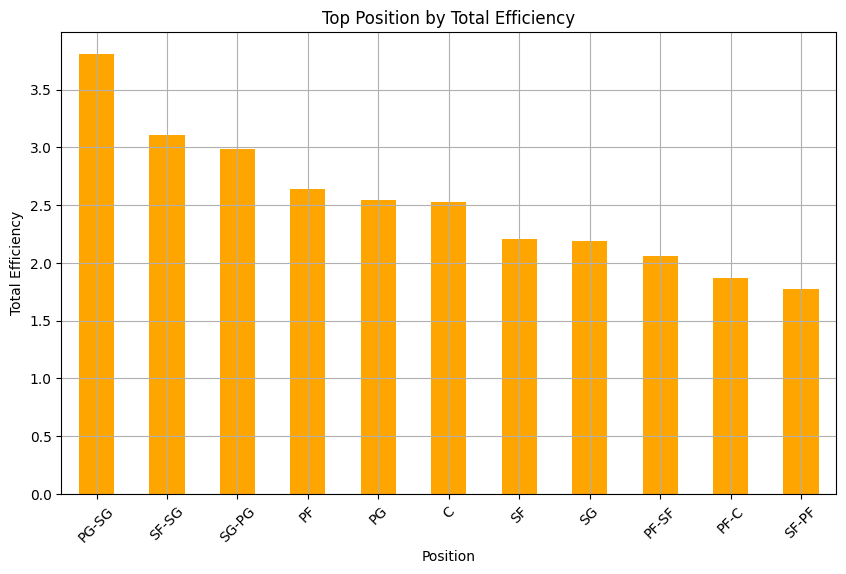

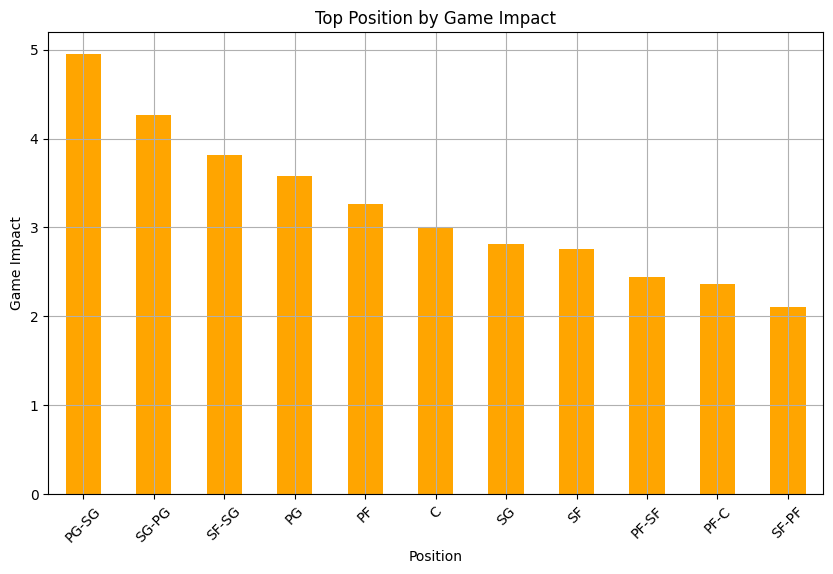

In [8]:
for col in position_analysis:
    if col != 'Pos' and col != 'Player' and col != 'Tm':
        position_avg_analysis = position_analysis.groupby('Pos')[col].mean().sort_values(ascending=False)
        position_avg_analysis = position_avg_analysis[position_avg_analysis != 0]
        plt.figure(figsize=(10, 6))
        position_avg_analysis.plot(kind='bar', color='orange')
        plt.title(f"Top Position by {col}")
        plt.xlabel('Position')
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

# Player x Position

In [62]:
player_position_analysis = df.loc[:, general_analysis_columns + ['Pos', 'Player']]

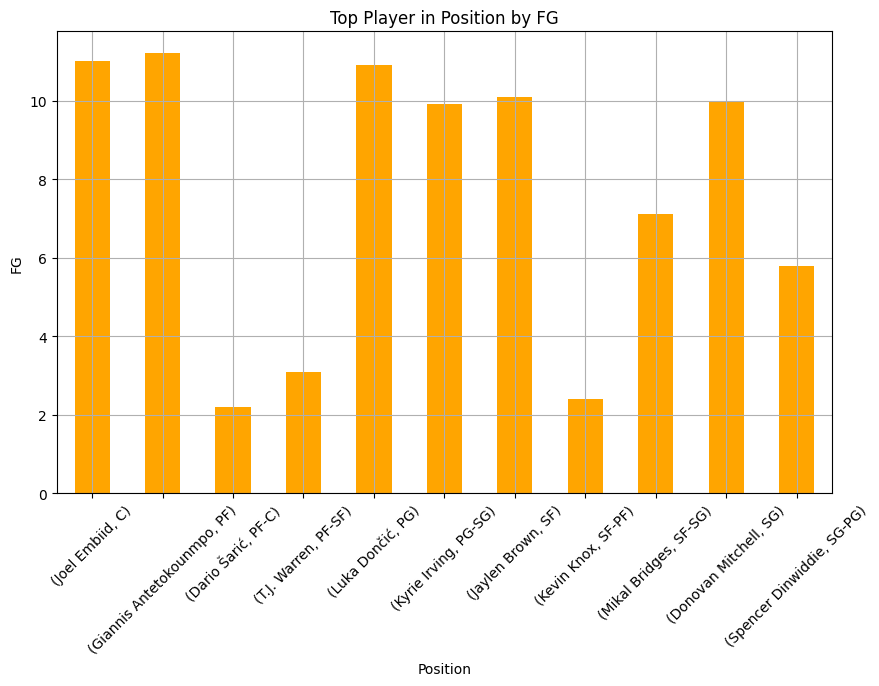

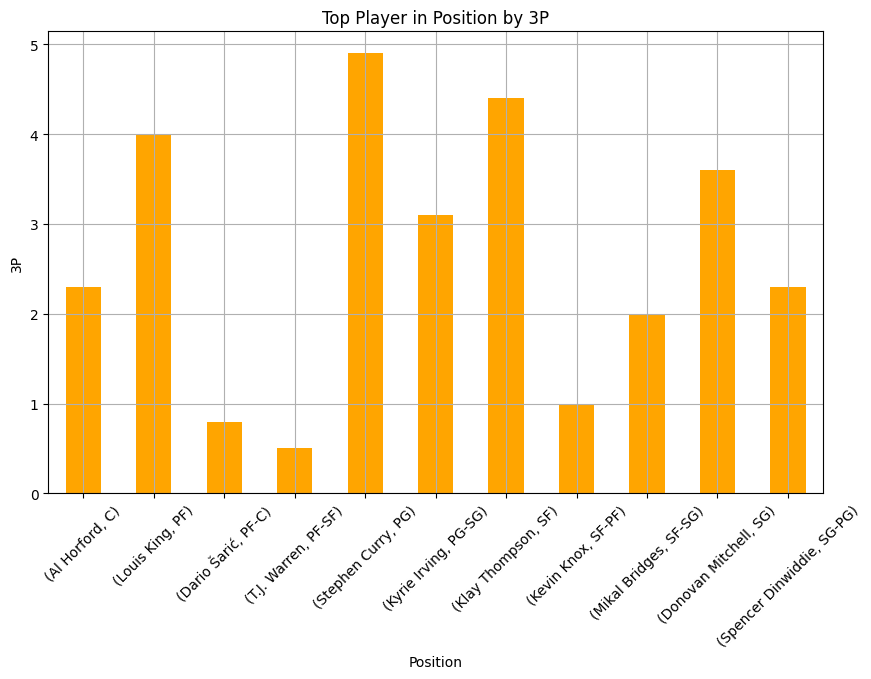

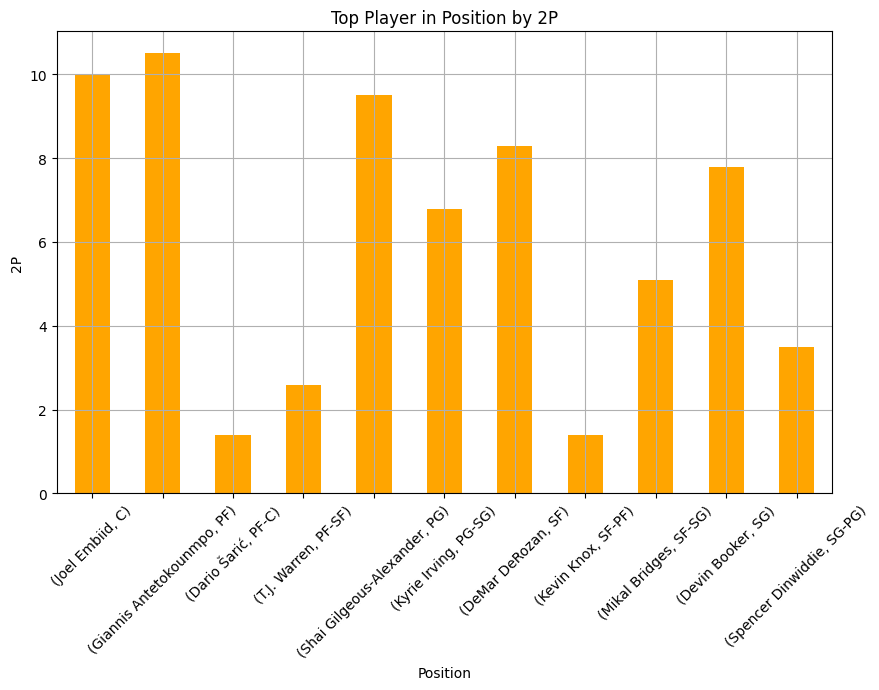

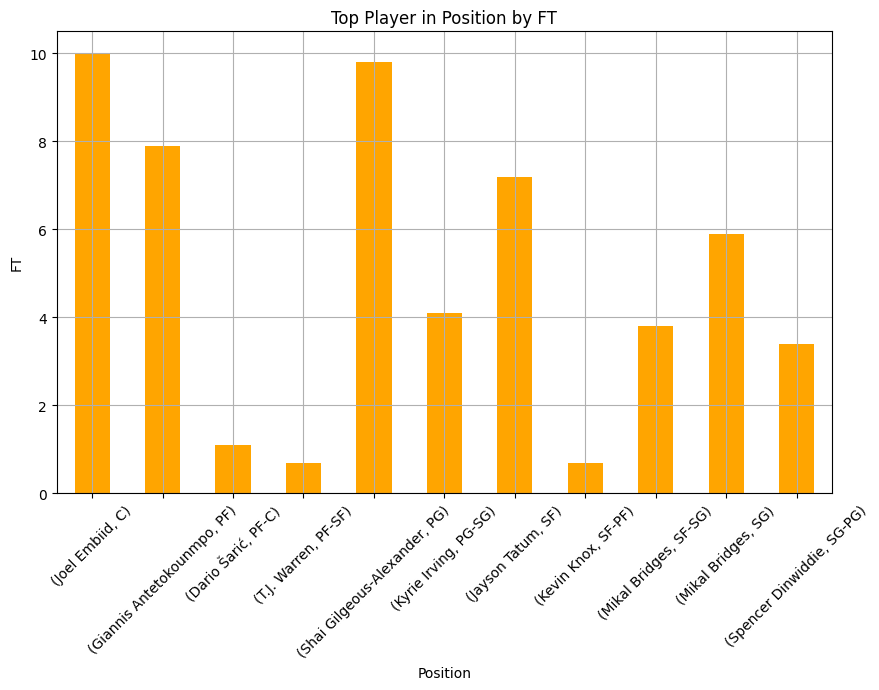

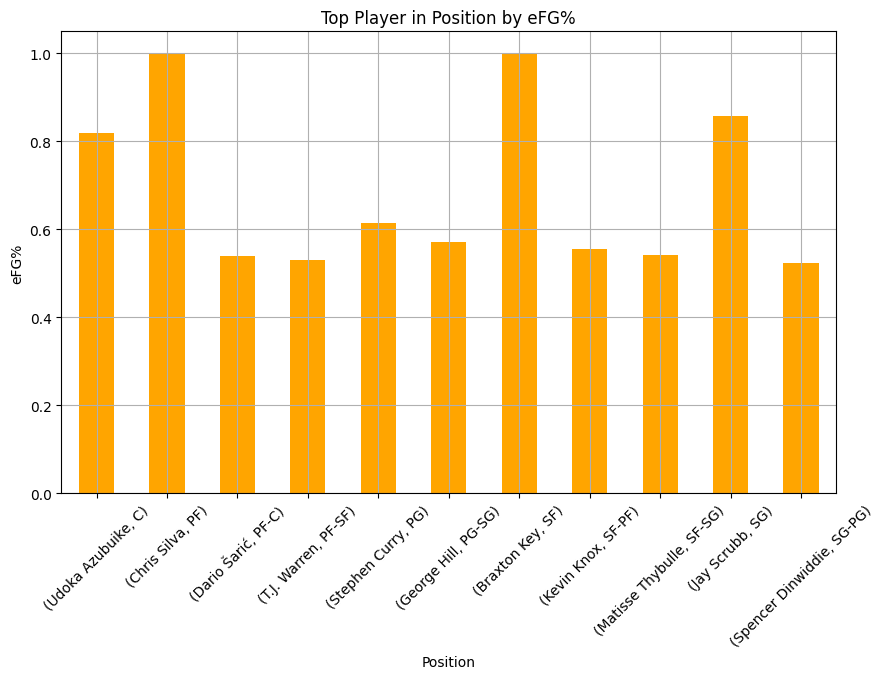

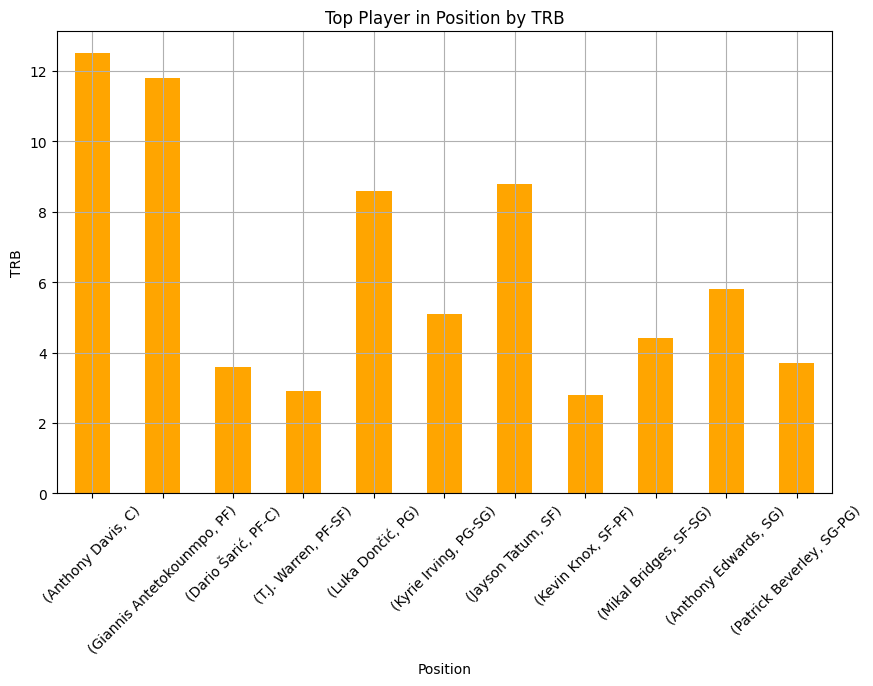

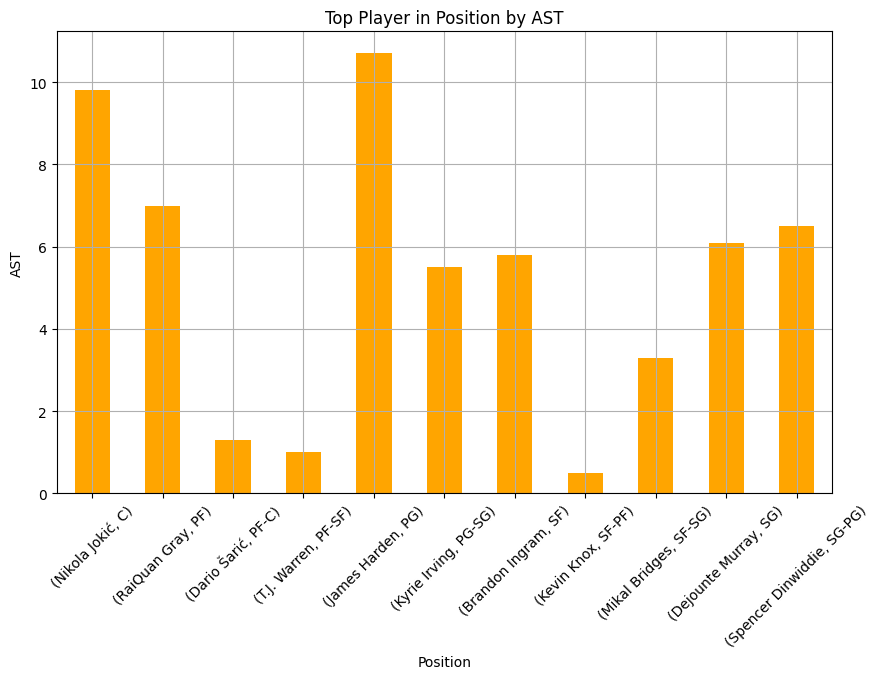

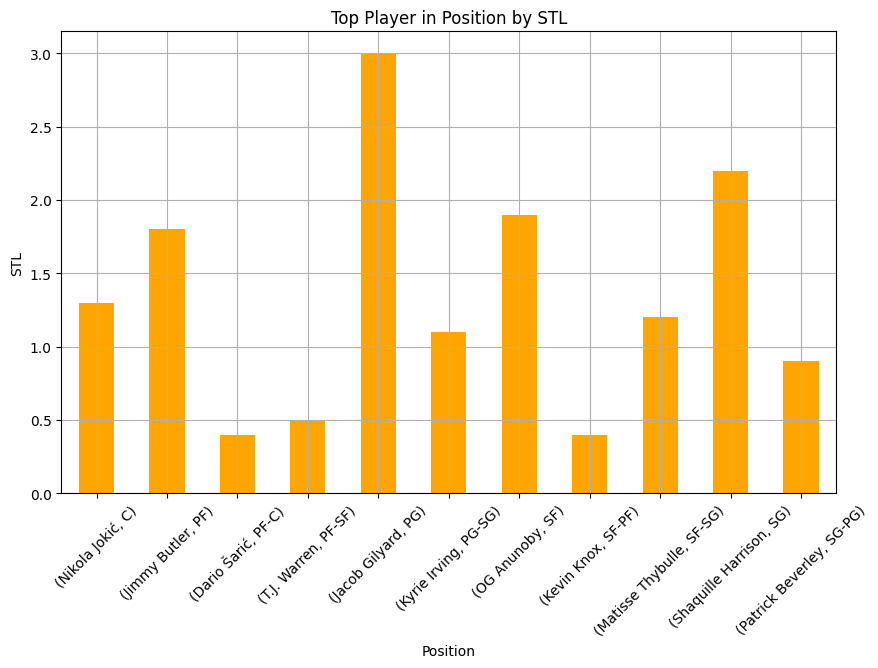

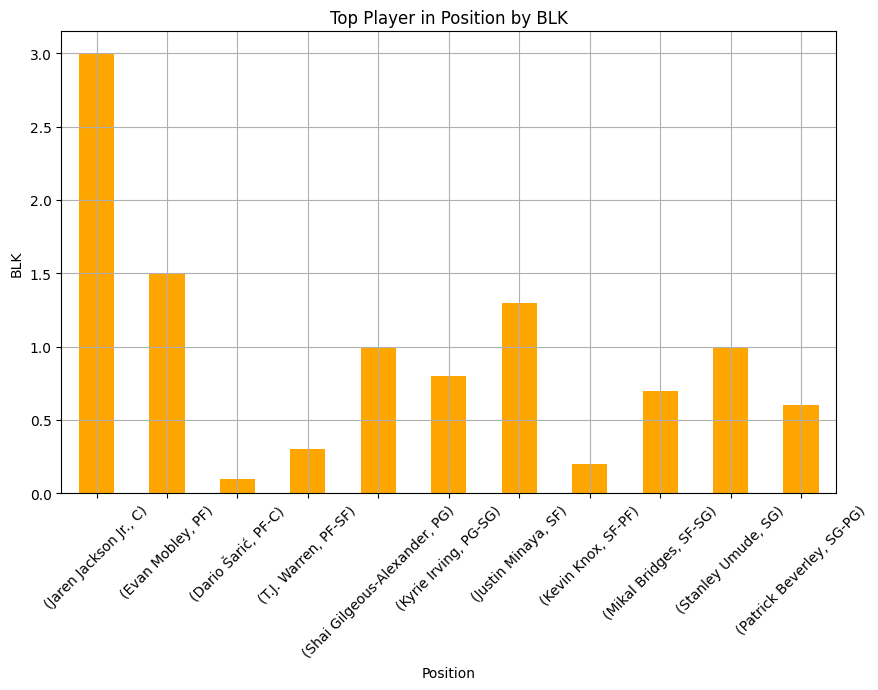

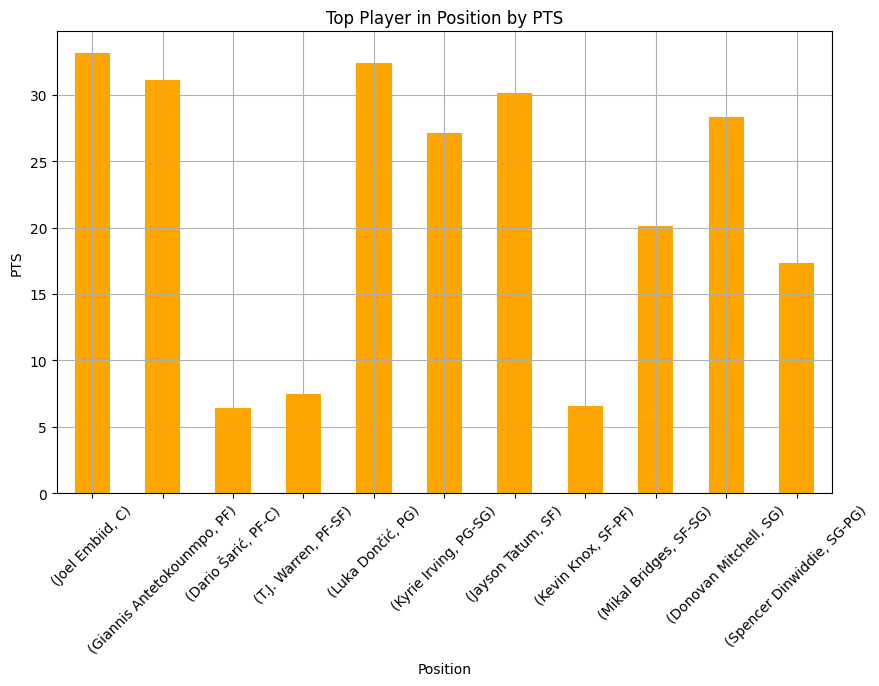

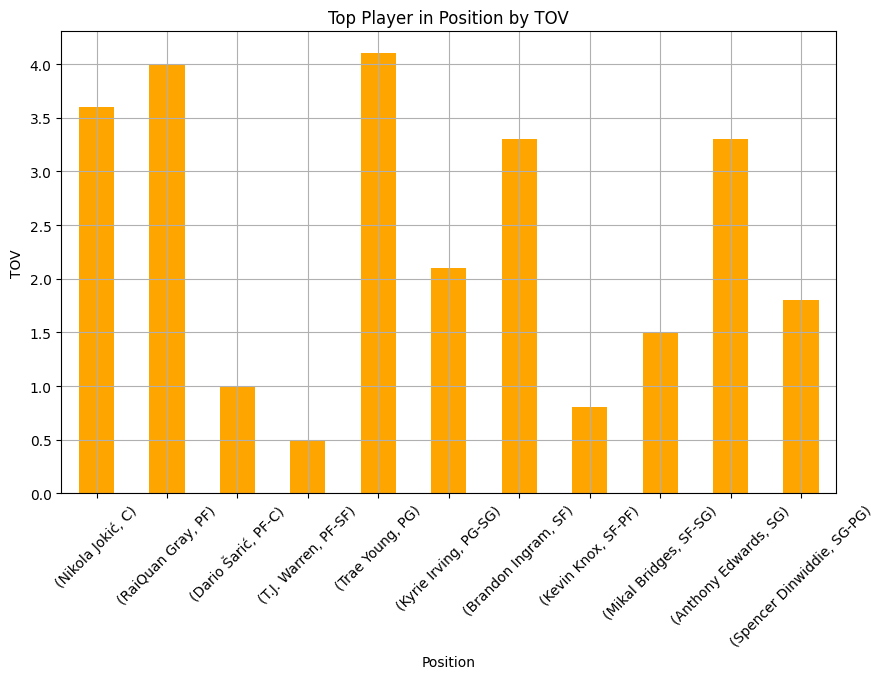

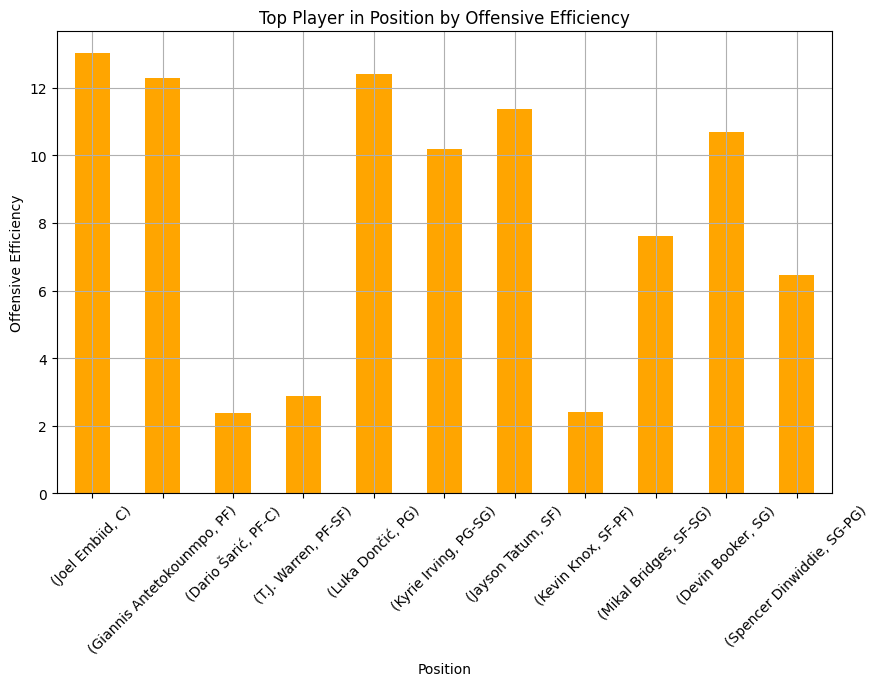

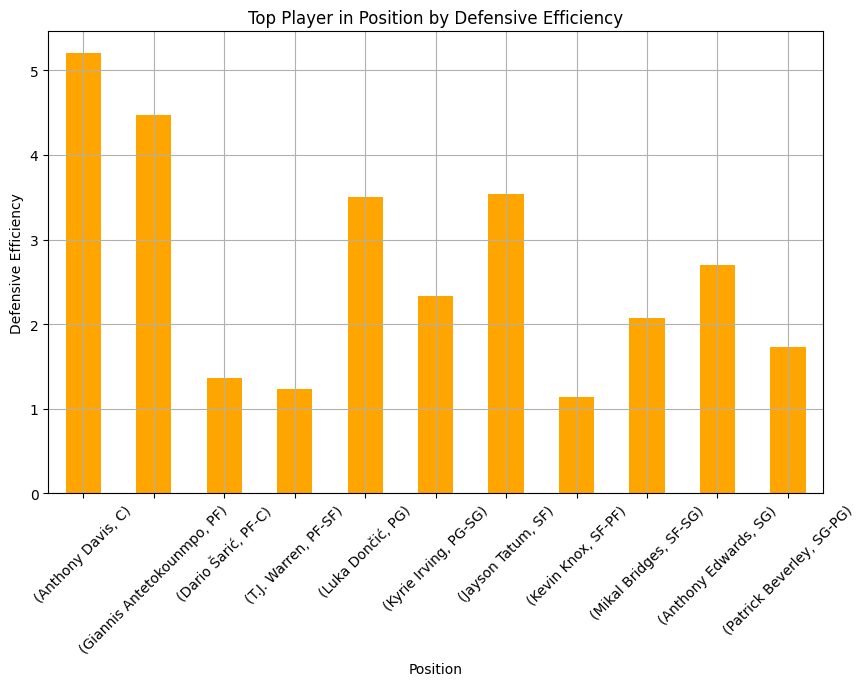

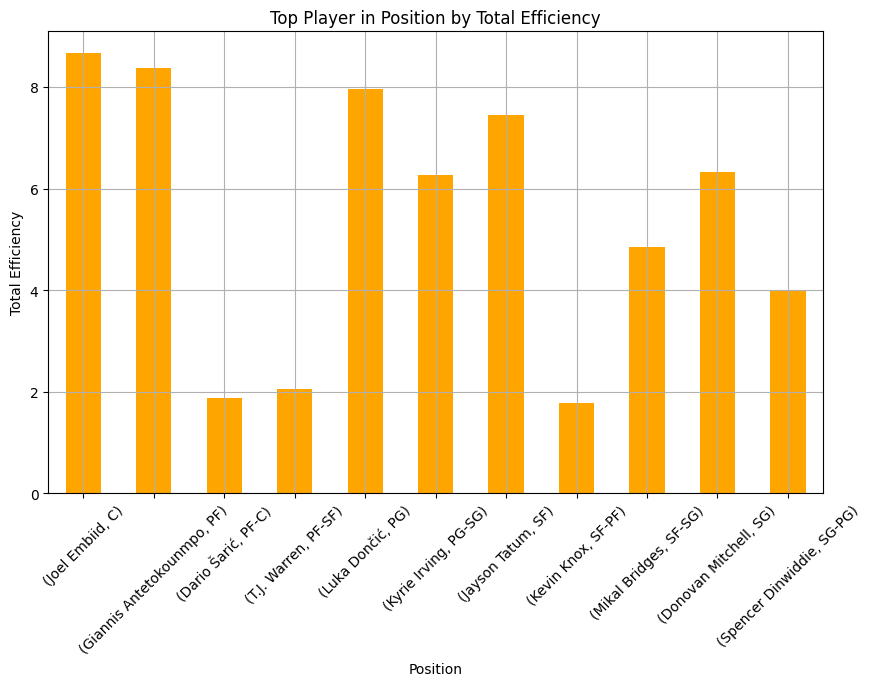

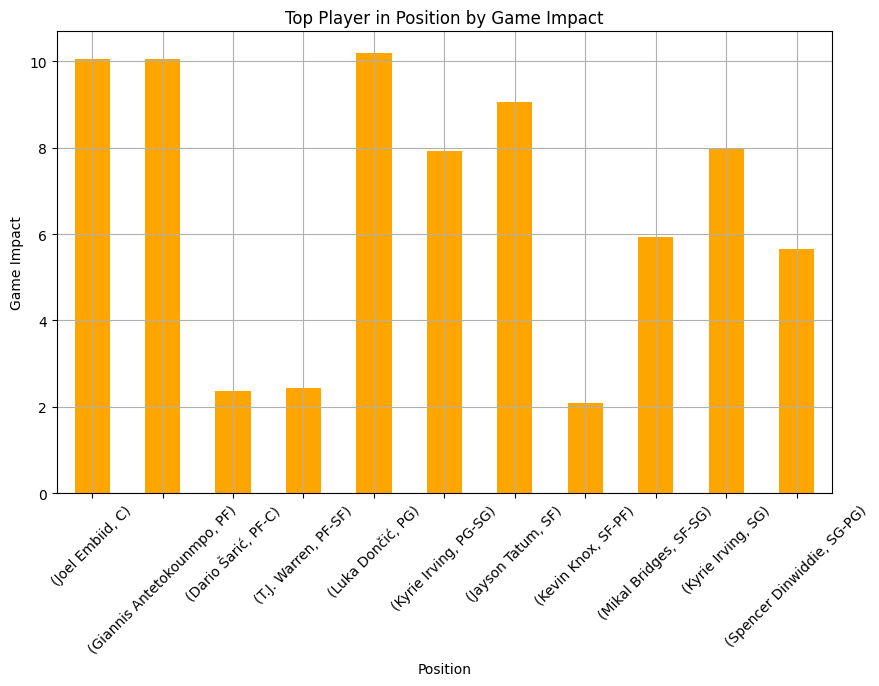

In [63]:
for col in player_position_analysis:
    if col != 'Player Pos' and col != 'Pos' and col != 'Player' and col != 'Tm':
        player_position_avg_analysis = player_position_analysis.groupby(['Player','Pos'])[col].mean()
        top_players_per_position = player_position_avg_analysis.groupby('Pos').idxmax()
        top_players_avg_analysis = player_position_avg_analysis.loc[top_players_per_position]

        plt.figure(figsize=(10, 6))
        top_players_avg_analysis.plot(kind='bar', color='orange')
        plt.title(f"Top Player in Position by {col}")
        plt.xlabel('Position')
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

# DEN X NBA

In [22]:
dev_df = df[df['Tm'] == 'DEN']
nba_df = df[df['Tm'] != 'DEN']

In [30]:
dev_analysis = dev_df.loc[:, general_analysis_columns + ['Player', 'Pos', 'Tm']]
nba_analysis = nba_df.loc[:, general_analysis_columns + ['Player', 'Pos', 'Tm']]

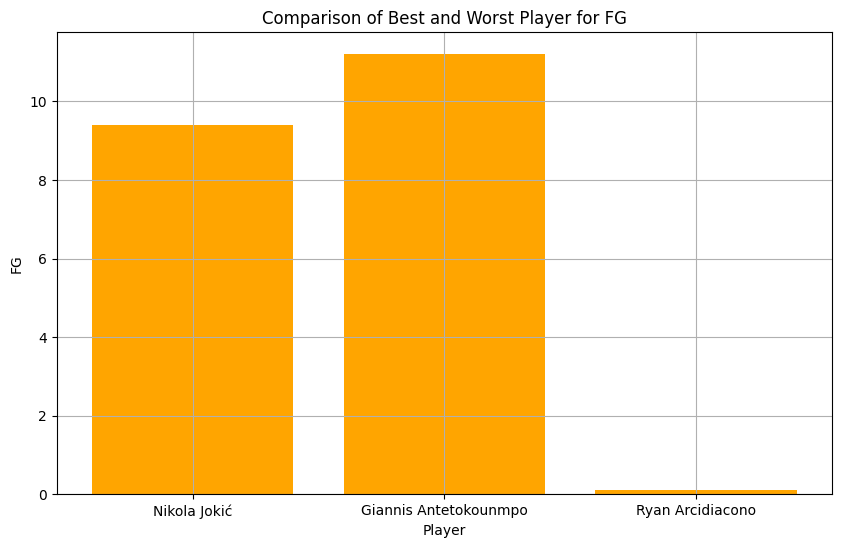

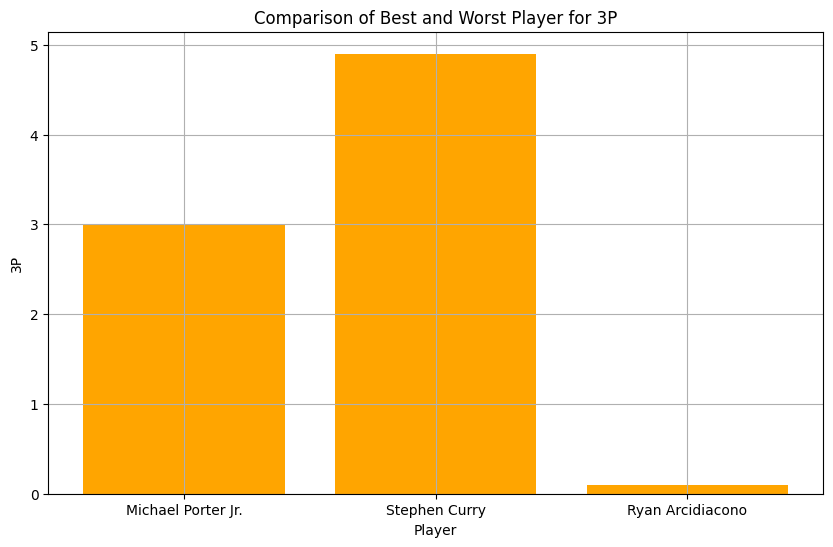

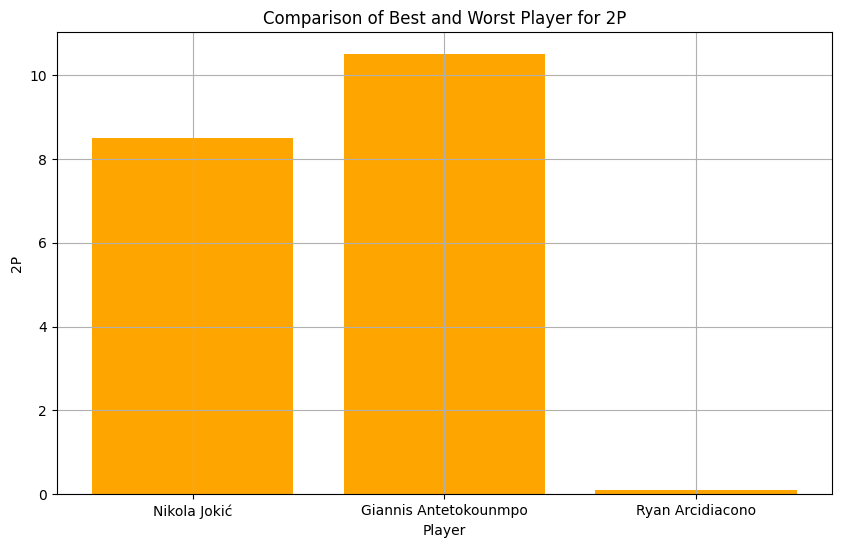

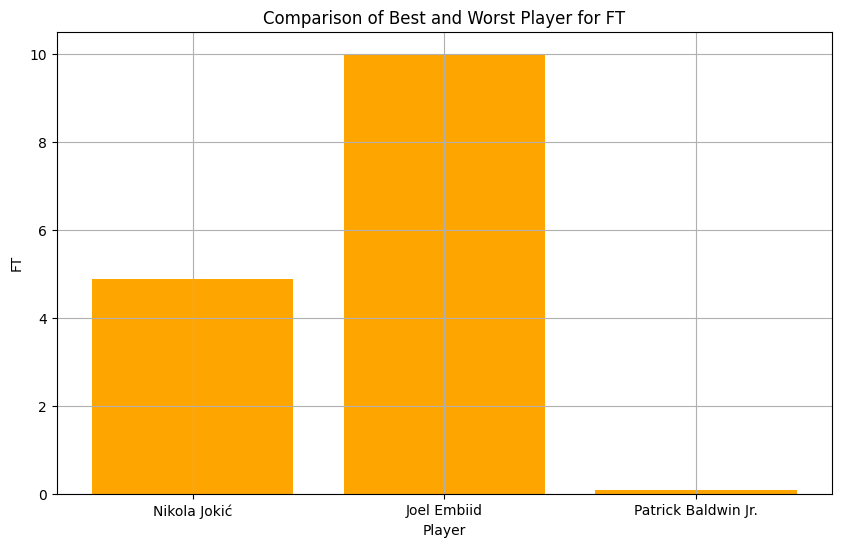

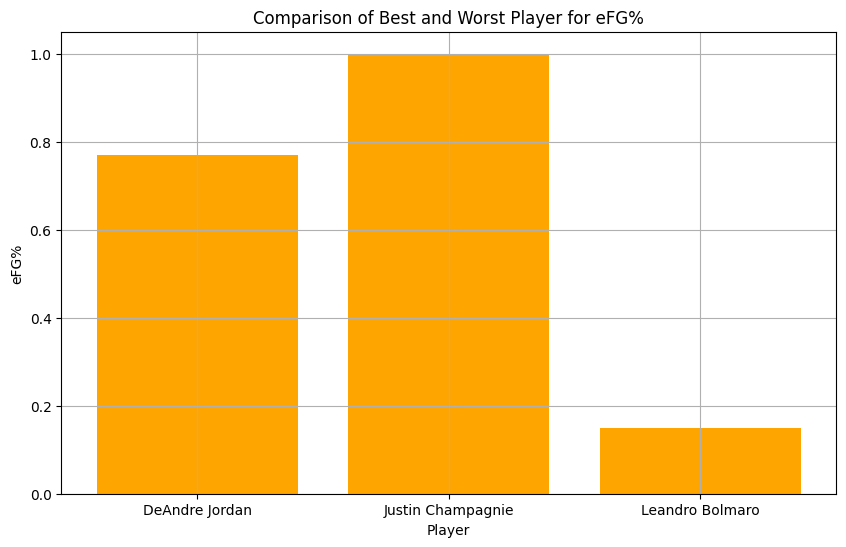

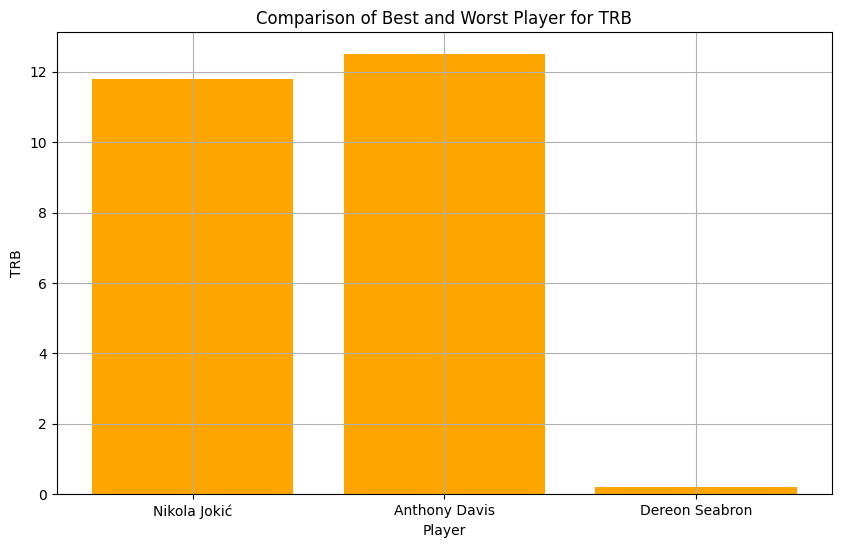

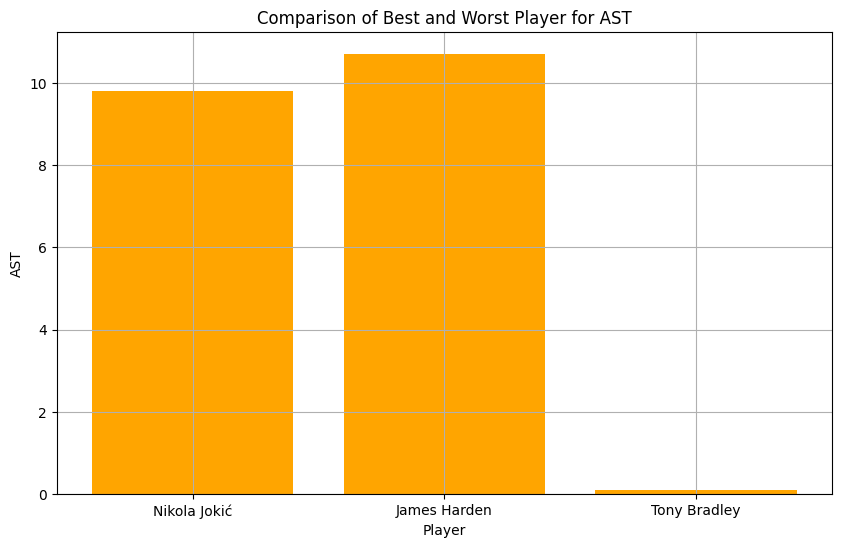

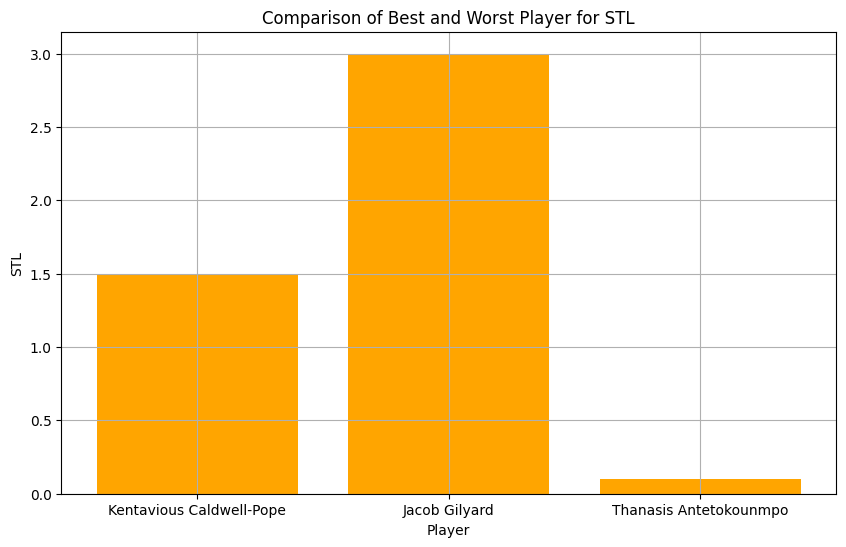

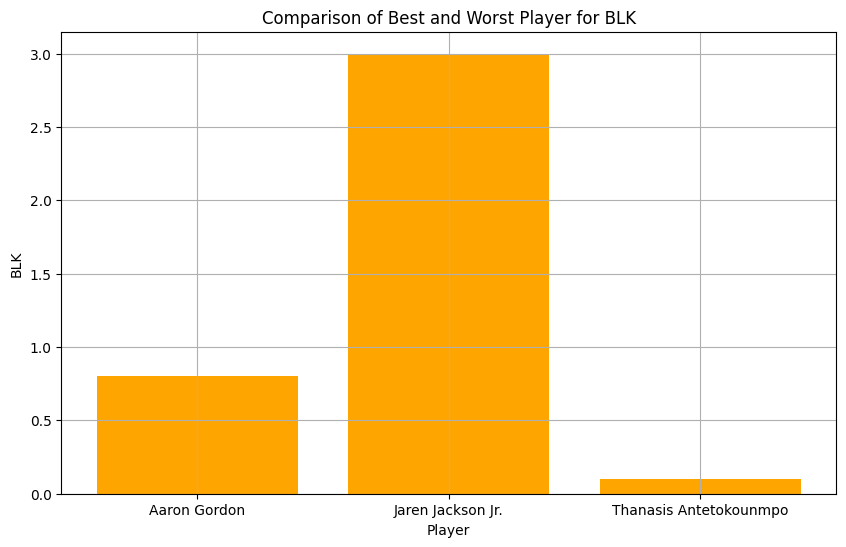

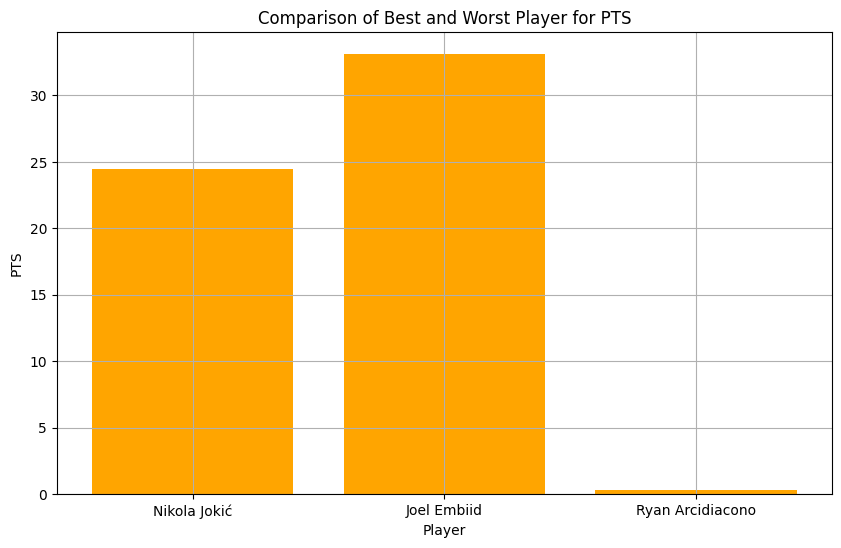

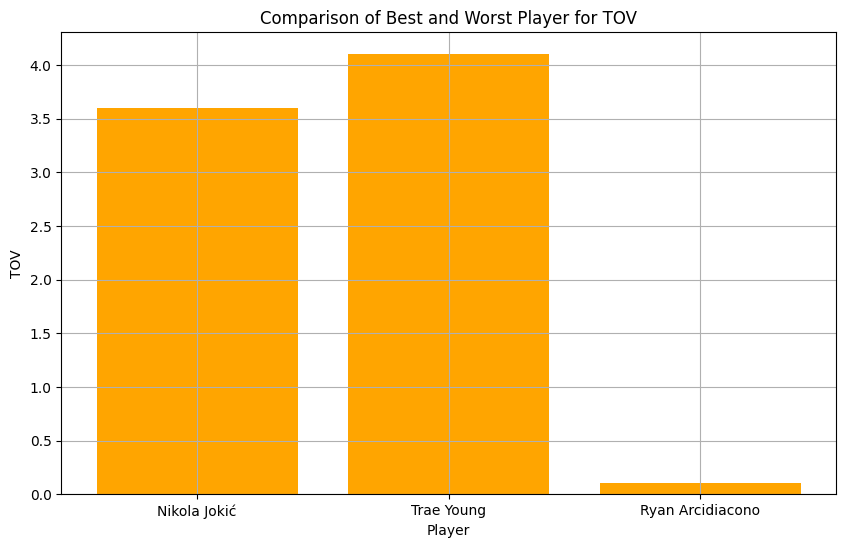

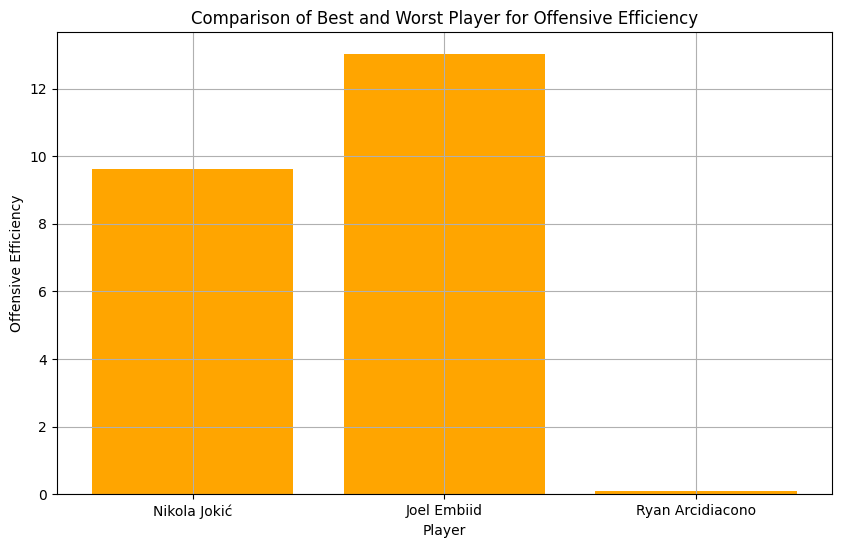

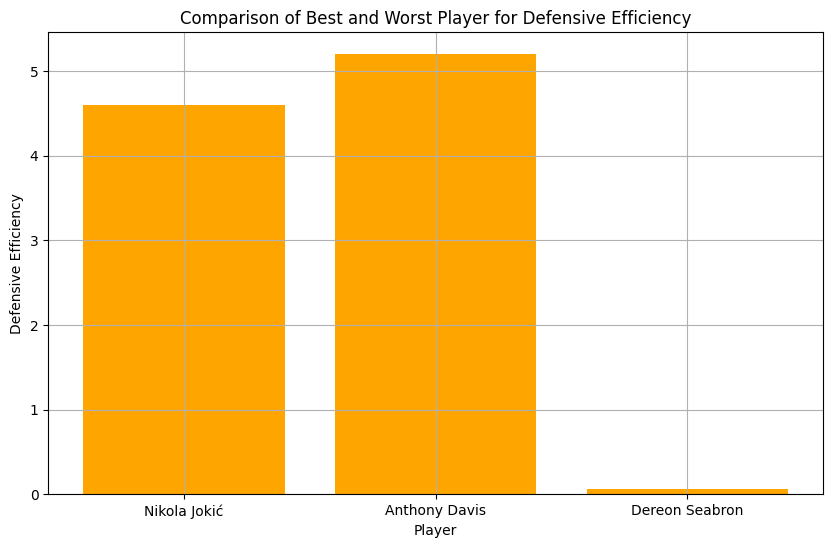

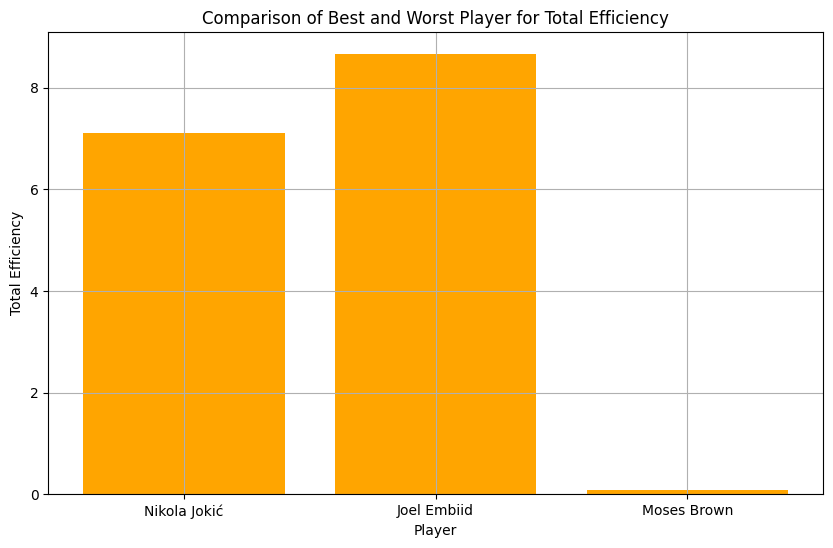

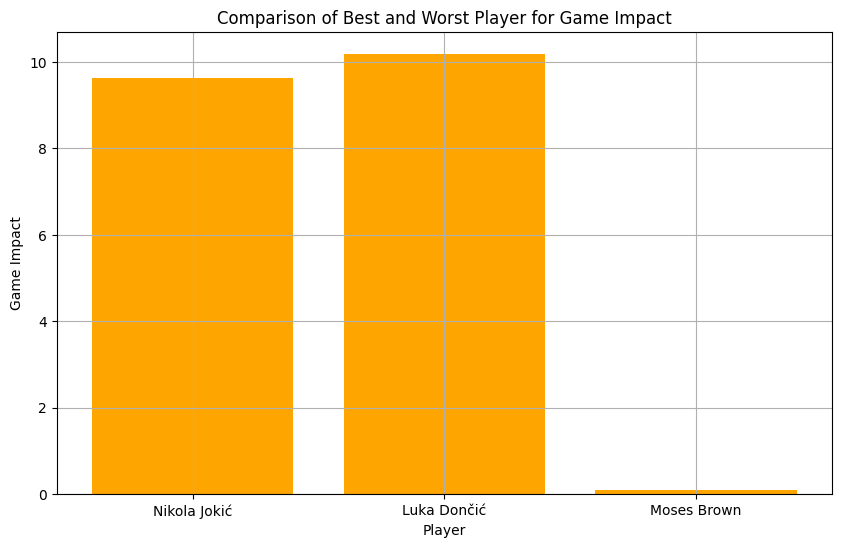

In [33]:
for col in dev_analysis:
    if col not in ['Player Pos', 'Pos', 'Player', 'Tm']:
        dev_best_player = dev_analysis.loc[dev_analysis[col].idxmax(), 'Player']
        nba_best_player = nba_analysis.loc[nba_analysis[col].idxmax(), 'Player']
        
        # Filter out non-positive values before finding the worst player
        positive_values = nba_analysis[nba_analysis[col] > 0]
        if not positive_values.empty:
            nba_worst_player = positive_values.loc[positive_values[col].idxmin(), 'Player']
        else:
            nba_worst_player = "No valid players"  # Fallback in case there are no positive values

        plt.figure(figsize=(10, 6))
        values = [dev_analysis[col].max(), nba_analysis[col].max(), positive_values[col].min() if not positive_values.empty else 0]
        plt.bar([dev_best_player, nba_best_player, nba_worst_player], values, color='orange')
        plt.title(f"Comparison of Best and Worst Player for {col}")
        plt.xlabel('Player')
        plt.ylabel(col)
        plt.grid(True)
        plt.show()